In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('google-data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [5]:
#The date column format is object. We need to convert it to datetime format.
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#No duplicates
len(df) == len(df.drop_duplicates())

True

In [7]:
#No null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#Currently our data doesn't have weekends. We need to insert dates for weekends in our dataset. We will use the
#forward fill method to fill NA values here. 
df1 = pd.DataFrame()
df1['Date'] = pd.date_range(start='2013-01-02', end='2017-12-29', freq='D')
df = pd.merge(df1,df,how='left',left_on='Date',right_on='Date')
df = df.fillna(method='ffill')

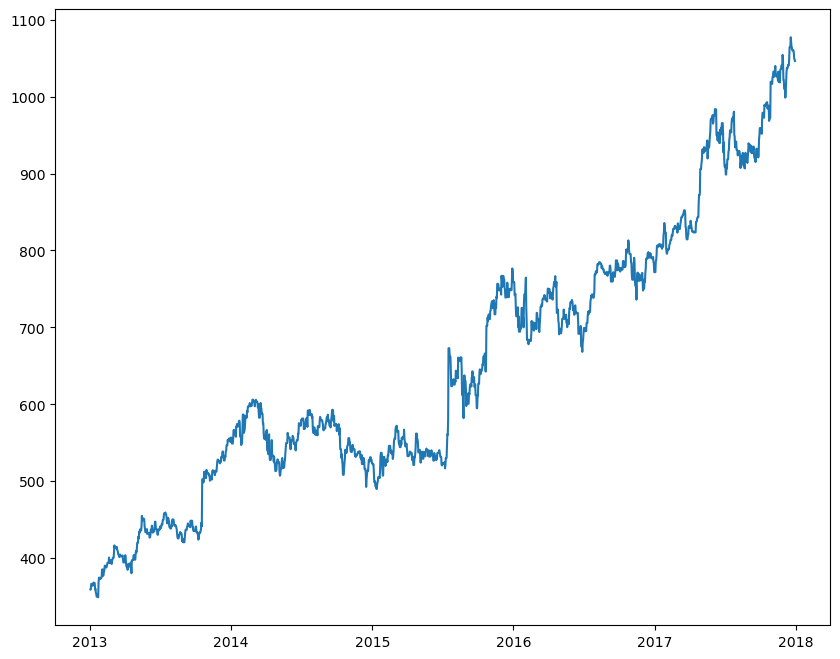

In [9]:
#Visualizing time series
plt.figure(figsize=(10,8))
plt.plot(df['Date'],df['Close'])

In [10]:
#We will predict only the Close price so we will drop other columns
df = df[['Date','Close']].copy()

In [11]:
df

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-05,366.600616
4,2013-01-06,366.600616
...,...,...
1818,2017-12-25,1060.119995
1819,2017-12-26,1056.739990
1820,2017-12-27,1049.369995
1821,2017-12-28,1048.140015


<font size="5">Building the Facebook prophet model</font>

In [12]:
#Creating prophet model and making forecast for the next 100 days
from fbprophet import Prophet
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet(interval_width=0.95)
model.fit(df)
forecast = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.

      99       5768.82    0.00169865       891.544           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5832.36    0.00733729       1253.92           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5894.68      0.111176        1959.8           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5922.25    0.00102421       408.607           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # ev

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<Figure size 1800x600 with 0 Axes>

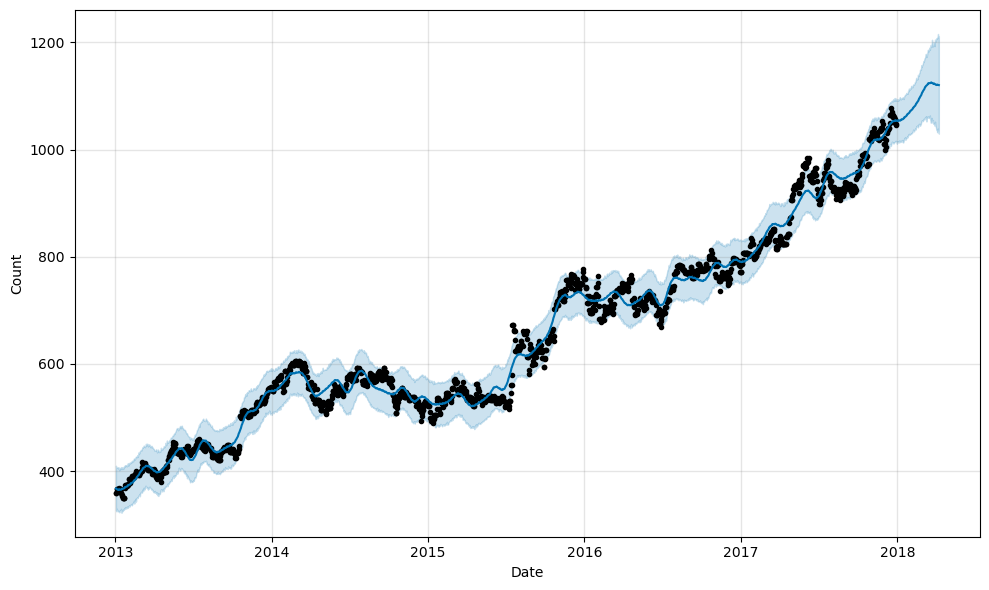

In [13]:
#Plotting the results of the whole model, including the forecast
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Count');

In [14]:
forecast = pd.merge(forecast,df,how='outer',on='ds')
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2013-01-02,367.100941,327.134319,410.123299,367.100941,367.100941,0.654666,0.654666,0.654666,0.760923,0.760923,0.760923,-0.106258,-0.106258,-0.106258,0.0,0.0,0.0,367.755607,359.288177
1,2013-01-03,367.449298,325.094689,405.680947,367.449298,367.449298,-0.825656,-0.825656,-0.825656,-0.023228,-0.023228,-0.023228,-0.802428,-0.802428,-0.802428,0.0,0.0,0.0,366.623642,359.496826
2,2013-01-04,367.797656,330.049383,406.485224,367.797656,367.797656,-1.173049,-1.173049,-1.173049,0.295499,0.295499,0.295499,-1.468548,-1.468548,-1.468548,0.0,0.0,0.0,366.624607,366.600616
3,2013-01-05,368.146013,326.958484,406.863715,368.146013,368.146013,-2.149775,-2.149775,-2.149775,-0.052578,-0.052578,-0.052578,-2.097197,-2.097197,-2.097197,0.0,0.0,0.0,365.996239,366.600616
4,2013-01-06,368.494371,325.010756,406.260857,368.494371,368.494371,-3.109052,-3.109052,-3.109052,-0.427011,-0.427011,-0.427011,-2.682042,-2.682042,-2.682042,0.0,0.0,0.0,365.385318,366.600616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2018-04-04,1120.227123,1032.362575,1209.083247,1045.219990,1199.733408,1.135784,1.135784,1.135784,0.760923,0.760923,0.760923,0.374861,0.374861,0.374861,0.0,0.0,0.0,1121.362907,NaN
1919,2018-04-05,1120.948118,1032.698364,1209.573291,1044.518959,1201.510858,-0.452675,-0.452675,-0.452675,-0.023228,-0.023228,-0.023228,-0.429447,-0.429447,-0.429447,0.0,0.0,0.0,1120.495444,NaN
1920,2018-04-06,1121.669114,1035.370127,1215.781876,1043.817881,1203.889392,-0.859005,-0.859005,-0.859005,0.295499,0.295499,0.295499,-1.154504,-1.154504,-1.154504,0.0,0.0,0.0,1120.810109,NaN
1921,2018-04-07,1122.390109,1039.352077,1208.035722,1043.116802,1206.267927,-1.846866,-1.846866,-1.846866,-0.052578,-0.052578,-0.052578,-1.794288,-1.794288,-1.794288,0.0,0.0,0.0,1120.543243,NaN


In [15]:
#We can also calculate the root mean squared error for the residuals. The model performance is very good. 
forecast['residuals'] = forecast['y'] - forecast['yhat']
rmse = round(np.sqrt((forecast['residuals'] ** 2).mean()),2)
print(f'The root mean squared error is: {rmse}')
count_mean = df['y'].mean()
print(f'rmse is {round(rmse*100/count_mean,2)}% of the mean value of Close price')

The root mean squared error is: 20.29
rmse is 3.11% of the mean value Close price


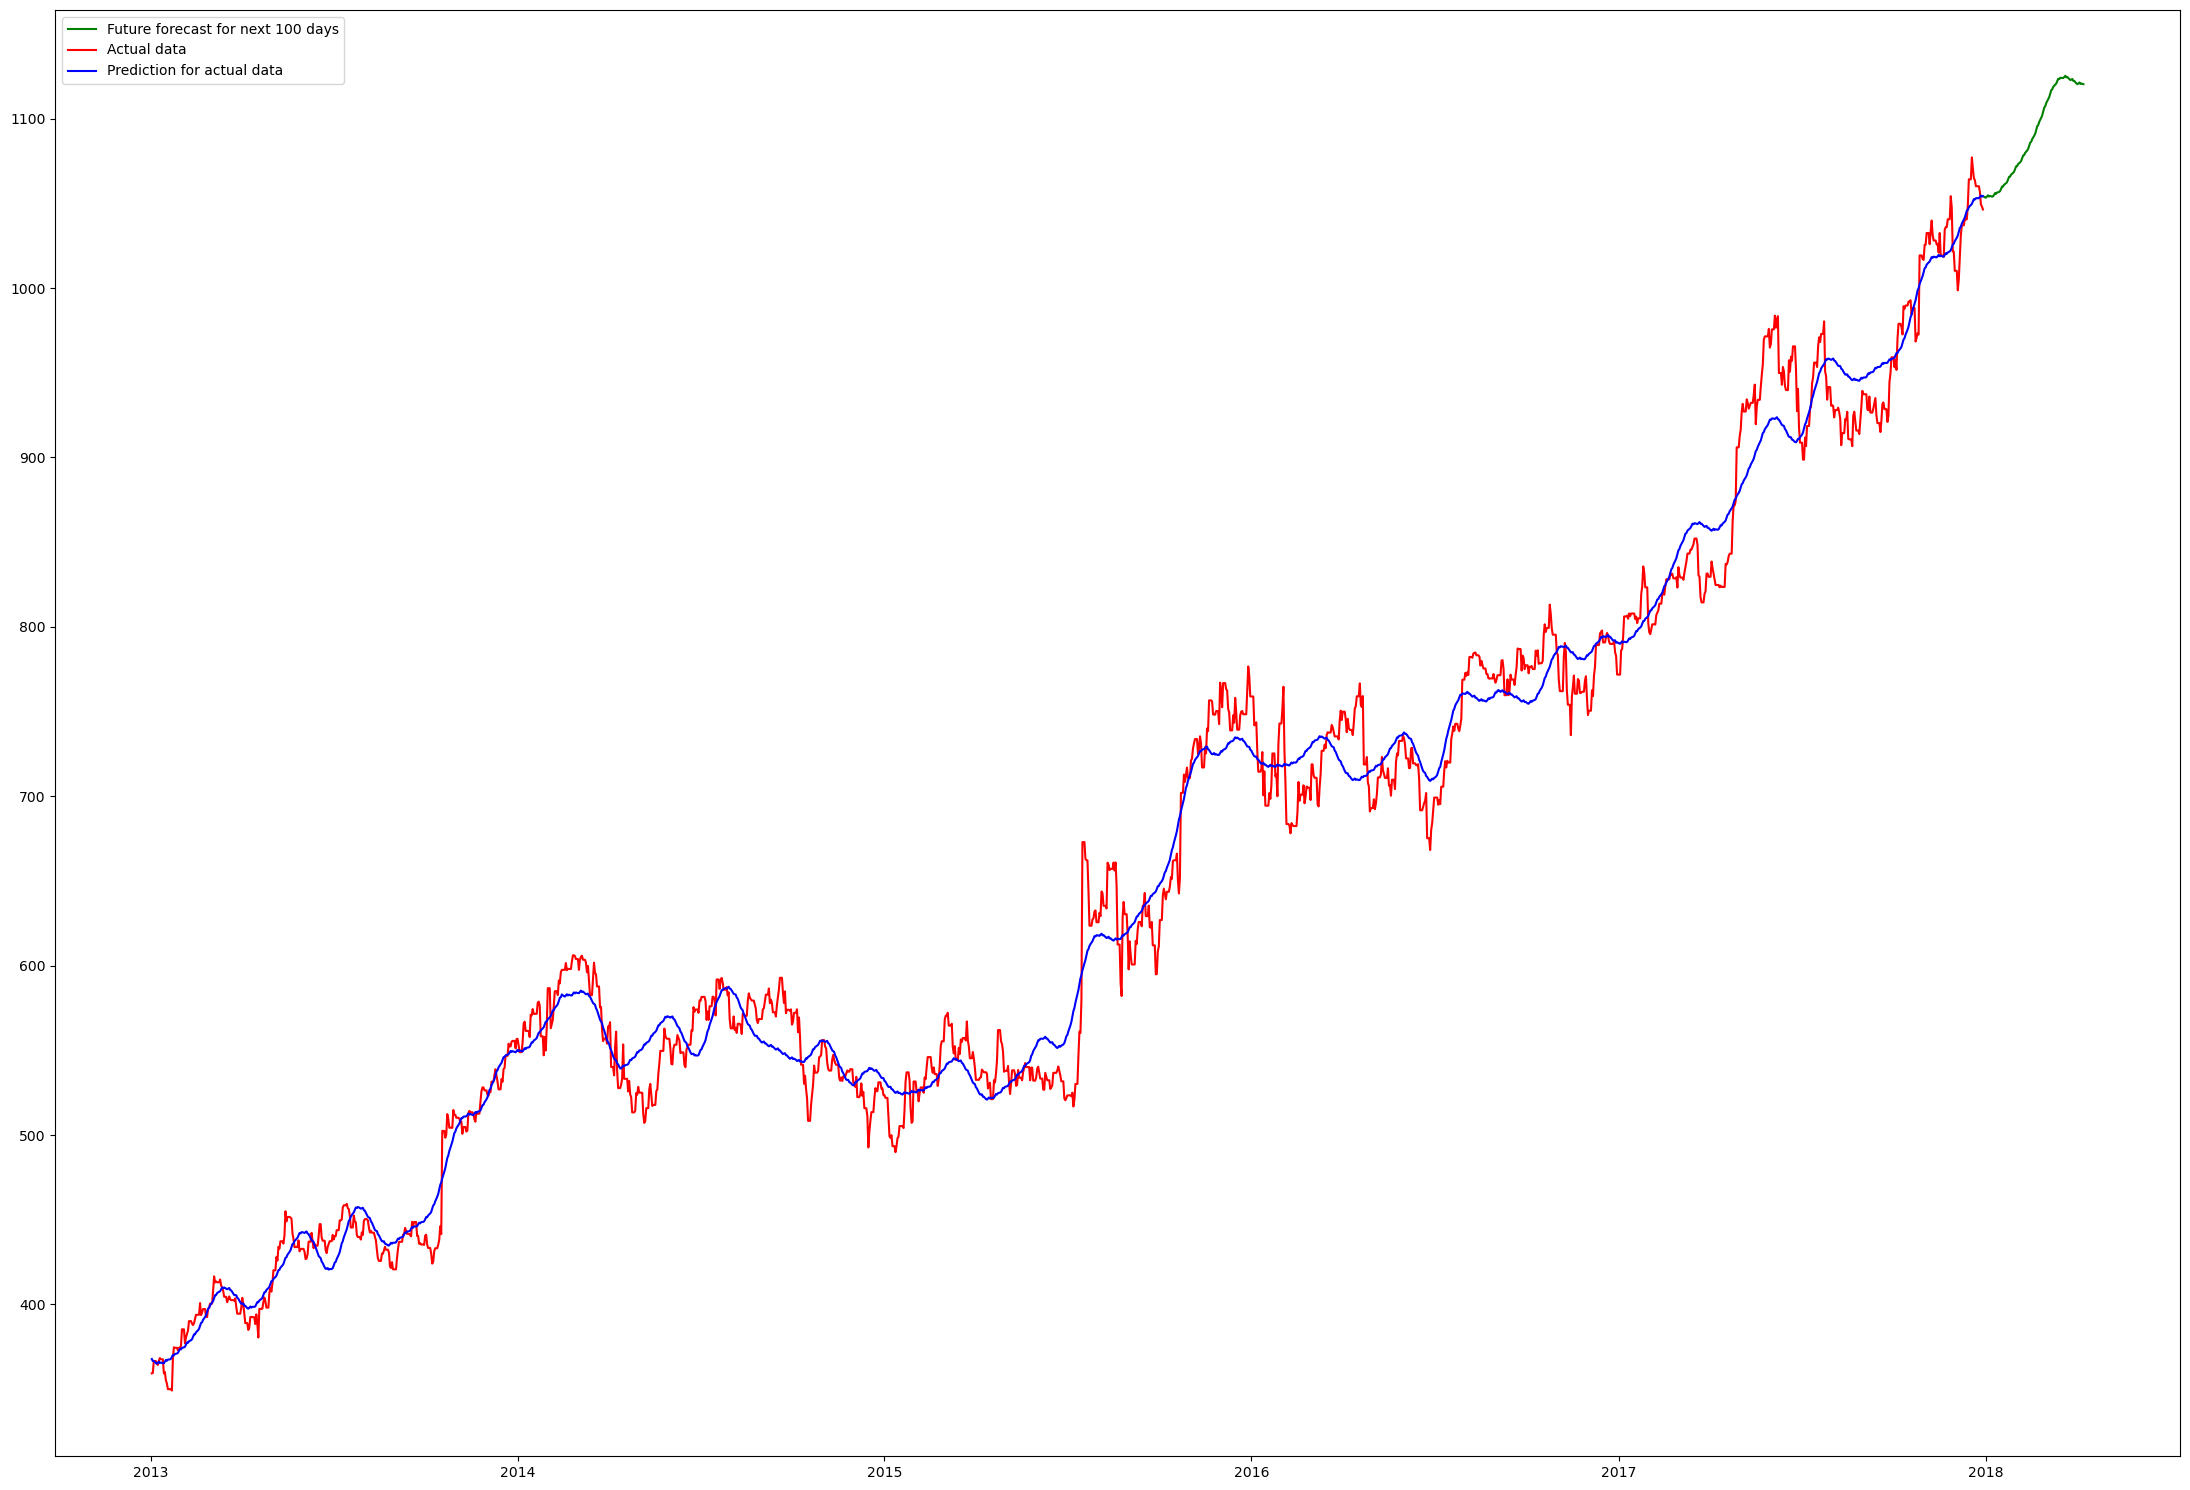

In [16]:
plt.figure(figsize=(22, 15))
plt.plot(forecast[-100:]['ds'],forecast[-100:]['yhat'],label='Future forecast for next 100 days',color='g')
plt.plot(forecast[:-100]['ds'],forecast[:-100]['y'],label='Actual data',color='r')
plt.plot(forecast[:-100]['ds'],forecast[:-100]['yhat'],label='Prediction for actual data',color='b')
plt.legend()
plt.tight_layout()

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


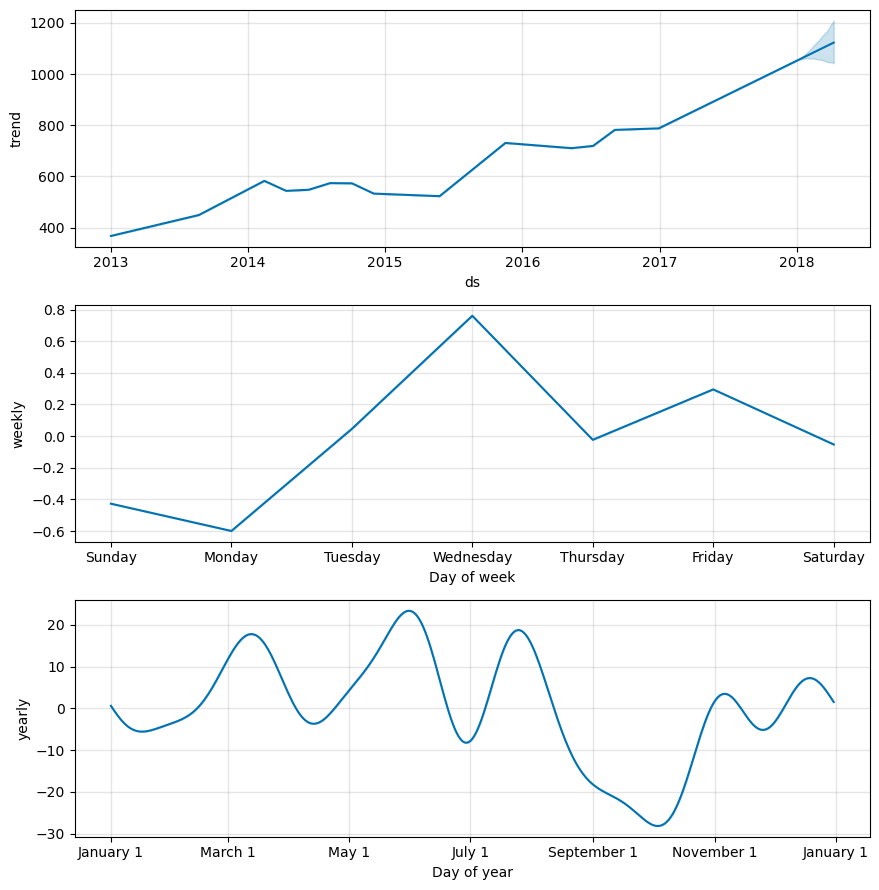

In [18]:
#Showing the components of the model
model.plot_components(forecast);

<font size="5">Now we will try to improve our model with HyperParameter tuning</font>

In [53]:
import itertools
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive','multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='100 days',
                     period='100 days',
                     initial='800 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4655.91   8.67651e-06       3408.02      0.5635     0.05635      148   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       4655.95   5.99793e-09       3191.97      0.1513      0.1513      198   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1782.66   1.82317e-06       3599.74       0.598       0.598      146   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       1784.25   0.000207725       3961.78   4.603e-08       0.001      243  LS failed, Hessian reset 
     199       1784.81   2.49936e-07       2797.68      0.8417      0.8417      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       1784.81   7.52724e-09       4224.22      0.2644      0.2644      331   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98        1955.5   0.000142112       3197.39   3.424e-08       0.001      173  LS failed, Hessian reset 
      99       1955.55   4.29394e-05       2728.29      0.9545      0.9545      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1955.77   7.68802e-09       4210.73       0.252       0.252      243   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       2299.81   0.000440028       4538.68   9.973e-08       0.001      161  LS failed, Hessian reset 
      99       2301.49   0.000142222        4075.9       0.457           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147        2303.5   8.29595e-09       2919.27     0.06225     0.06225      230   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98          2598   6.84855e-05       5124.97    1.34e-08       0.001      170  LS failed, Hessian reset 
      99       2598.04   3.38616e-05       4437.95           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       2598.16   3.56524e-09       4603.46      0.2095      0.2095      239   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2839.26    7.8791e-06       4536.89      0.8002      0.8002      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       2839.52   6.35615e-08       4616.53   1.437e-11       0.001      259  LS failed, Hessian reset 
     175       2839.52   5.94941e-09        4448.1      0.1837           1      270   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3124.85   4.63091e-05       4831.87           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       3124.99   5.67681e-09       4358.56      0.4298      0.4298      196   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3436.4   0.000185715        4923.4      0.6163      0.6163      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       3436.67   4.14897e-09        4614.6      0.1385      0.1385      178   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3760.77   5.61691e-08       4177.68      0.4728      0.4728      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       3760.77   6.87365e-09       4096.17     0.08026           1      139   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4126.76   1.24674e-05       3843.24      0.7518      0.7518      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       4126.84    1.4561e-05       3520.15   3.527e-09       0.001      182  LS failed, Hessian reset 
     129       4126.87    8.5019e-09       3458.94      0.8172      0.8172      217   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4308.85   0.000357981       3284.17           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4318.22   1.89835e-06       3421.34           1           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       4318.22   9.94412e-09       3210.53      0.5247     0.05247      295   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4670.81   7.26228e-05       3124.24      0.2405           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       4670.98   6.23788e-06       3863.08    1.89e-09       0.001      204  LS failed, Hessian reset 
     153       4671.01   9.14003e-09       3509.46      0.2502      0.2502      245   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       1787.74   5.92335e-05       4384.27    1.58e-08       0.001      152  LS failed, Hessian reset 
      99       1787.89   1.94421e-05       3615.71      0.4121      0.4121      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1789.84   2.36696e-07       3537.94           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       1789.84   6.43669e-09        3983.9     0.08171     0.08171      327   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       1957.58    9.3883e-05       3174.62   2.038e-08       0.001      149  LS failed, Hessian reset 
      99       1957.71   3.61957e-07       2889.63           1           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1957.72   1.74778e-06       4251.75   4.381e-10       0.001      256  LS failed, Hessian reset 
     144       1957.73   5.50542e-09        3613.1      0.3455      0.8419      295   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2296.46   1.36489e-06       3359.02      0.6809      0.6809      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       2300.74   0.000141237       4893.54   4.115e-08       0.001      200  LS failed, Hessian reset 
     199       2305.25    0.00041621       3340.64      0.4137           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       2305.96   2.11888e-06       4242.98   4.872e-10       0.001      460  LS failed, Hessian reset 
     299       2305.96   3.46729e-07       3202.04      0.9281      0.9281      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       2305.96   1.01114e-09       3466.78     0.06273     0.06273      492   
Optimization terminat

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2609.69   2.80957e-05       5533.93   7.616e-09       0.001      151  LS failed, Hessian reset 
      99       2609.76   1.34947e-06       4208.61      0.3784           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2609.78   4.32742e-09       4711.43      0.2989      0.2989      210   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2834.47   0.000153705        4760.4           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       2839.58    3.9567e-05       4897.78   7.725e-09       0.001      230  LS failed, Hessian reset 
     199       2839.97   1.17553e-07       4848.38     0.03428           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       2839.97   3.69414e-09       5014.63     0.02747     0.02747      311   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3130.81   2.98547e-05       4715.67           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       3131.36   8.44537e-05       5021.25   1.572e-08       0.001      169  LS failed, Hessian reset 
     152       3131.77     7.988e-09       4820.08      0.5539      0.5539      226   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3439.23   1.38108e-05       5394.64      0.3283           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3445.51   3.53603e-07       4870.61           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       3445.51   8.13025e-09       4073.65      0.4128           1      319   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       3763.86   0.000402794       4924.37   7.402e-08       0.001      141  LS failed, Hessian reset 
      99       3765.12   1.66119e-06       4893.97      0.3776      0.3776      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       3765.14   7.57387e-09       5072.13      0.3465      0.3465      215   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       4131.59   3.98296e-05       4801.36   8.833e-09       0.001      136  LS failed, Hessian reset 
      99       4131.71   1.30551e-07       3200.05      0.4634           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       4131.71   8.11953e-09       4073.33      0.2461      0.2461      179   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4307.05   1.67637e-05       3474.84      0.2699           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       4307.64   4.78009e-09       3324.86     0.08457           1      258   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4659.44   1.06893e-05       3136.38      0.5787      0.5787      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       4660.07    5.6563e-06        3145.1   1.534e-09       0.001      256  LS failed, Hessian reset 
     199       4660.44   9.21323e-06       2514.39           1           1      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       4660.51   4.20935e-06       2929.65   1.069e-09       0.001      385  LS failed, Hessian reset 
     234       4660.52   6.31195e-09       3286.37     0.07569     0.07569      405   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       1786.02   0.000135194       4732.99   3.391e-08       0.001      151  LS failed, Hessian reset 
      99       1786.26    1.0948e-05        4098.2      0.6538      0.1244      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1786.32   9.42393e-09       4194.72      0.2323           1      254   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1959.54   4.04587e-07       3866.46      0.3127           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       1961.16   0.000425304        4243.2   1.792e-07       0.001      236  LS failed, Hessian reset 
     199       1962.27   1.21304e-05       3817.99      0.7436      0.7436      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       1962.93   9.27527e-07       3449.59   1.976e-10       0.001      487  LS failed, Hessian reset 
     299       1962.93   8.27015e-08       3458.64      0.3191           1      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       1962.93   1.77151e-09       2785.17      0.1778      0.1778      520   
Optimization terminat

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       2302.69   0.000913708       4052.08    2.34e-07       0.001      150  LS failed, Hessian reset 
      99       2304.72   1.05665e-05       3168.19           1           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       2304.76   4.65243e-09       4057.09      0.5006      0.5006      232   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       2609.52   5.70111e-09       4480.12      0.3883      0.3883      113   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2840.06   1.98815e-05          4128      0.7362      0.7362      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       2840.15   1.99928e-07       4653.47   4.231e-11       0.001      259  LS failed, Hessian reset 
     176       2840.15   9.47342e-09       4482.08      0.4476           1      274   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3104.92   6.47017e-05       3945.28      0.5987      0.5987      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       3105.65   7.31394e-05       5348.88   1.334e-08       0.001      189  LS failed, Hessian reset 
     199       3106.54   8.48438e-07       3280.57      0.3702           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       3106.56   2.38692e-06       5102.25   4.619e-10       0.001      378  LS failed, Hessian reset 
     255       3106.57   3.99753e-09       4021.47       0.278       0.278      410   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3439.36    0.00136072       4340.64      0.4496      0.4496      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       3441.61   1.89373e-06       4312.76   3.851e-10       0.001      247  LS failed, Hessian reset 
     190       3441.63   7.81291e-09       4432.42      0.4049      0.4049      281   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3763.46    3.5491e-08       3963.69      0.2243           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       3763.46   6.03618e-09       4335.21      0.3964      0.3964      136   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       4126.41   3.32161e-05       3664.81   8.143e-09       0.001      158  LS failed, Hessian reset 
      99       4126.48   5.83197e-05       4102.93           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171        4126.6   8.90989e-09       4293.26      0.1721      0.1721      260   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4309.57   0.000130535       4068.83      0.5917      0.5917      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4311.94   6.77768e-06       3354.66      0.2065           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       4312.11   8.78395e-09        3427.1      0.2417           1      380   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4681.76    0.00163666       3905.66           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       4682.21   4.70559e-09       3187.62      0.2925      0.8726      201   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       1788.95   0.000400309       4034.05   7.991e-08       0.001      159  LS failed, Hessian reset 
      99        1789.9   1.07976e-05       3640.94      0.9725      0.9725      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       1790.13   6.01017e-09       3538.22      0.1258     0.01258      284   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1962.54   2.47481e-05        4781.4           1           1      143   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1962.57   6.15685e-09       3839.31      0.4073      0.4073      185   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2302.91   1.36019e-07       3374.08           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       2302.91   5.59939e-09          3423      0.6623      0.6623      152   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       2620.52   0.000139073        4307.9   2.731e-08       0.001      142  LS failed, Hessian reset 
      99       2621.01   2.08794e-06        4589.4      0.6975      0.6975      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2621.06   2.64843e-06       4479.82   5.685e-10       0.001      250  LS failed, Hessian reset 
     170       2621.09   1.87557e-06       5093.54   4.215e-10       0.001      330  LS failed, Hessian reset 
     199       2621.11   3.70549e-08        4139.1           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       2621.11   5.28555e-09       4467.12      0.3226      0.3226      374   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2856.27   1.41626e-05       4741.66      0.4268           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       2856.65   1.81578e-05       5128.61   3.868e-09       0.001      251  LS failed, Hessian reset 
     190       2856.75    6.7033e-09        4751.4      0.5173      0.5173      300   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       3136.24   0.000427278       5767.76   8.776e-08       0.001      168  LS failed, Hessian reset 
      99       3137.46   5.09868e-05       3629.33      0.6592      0.6592      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       3137.71   3.06216e-09       4162.85      0.1755      0.1755      246   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81        3443.5    0.00018449       4487.93    3.67e-08       0.001      139  LS failed, Hessian reset 
      99        3444.1     3.326e-06       4213.56      0.7463      0.7463      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3444.24   5.88874e-08       4190.39      0.9121      0.9121      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3451.16   8.90119e-09       5055.12      0.1737      0.1737      417   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3771.11   1.63592e-06       5111.48           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121        3771.7   4.49771e-05       4822.74   9.038e-09       0.001      204  LS failed, Hessian reset 
     172          3772   4.50513e-07       4570.11   9.433e-11       0.001      315  LS failed, Hessian reset 
     185          3772   8.34732e-09       4658.31      0.4012      0.4012      334   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       4136.33   8.65938e-06       4646.97   2.338e-09       0.001      166  LS failed, Hessian reset 
      99       4136.43   5.98089e-06       4343.05      0.2252           1      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       4136.45   7.30579e-09       3923.34      0.5647      0.5647      220   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4311.24   6.22881e-07       3173.24           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4319.03   4.49081e-07          3621           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       4319.16    3.8759e-05       3940.42   8.159e-09       0.001      336  LS failed, Hessian reset 
     263       4319.24   4.62674e-09       3560.39      0.1262      0.1262      394   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          4666    2.1872e-07       3590.32      0.3078           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       4666.45   4.72907e-05       2818.95   1.217e-08       0.001      212  LS failed, Hessian reset 
     199       4666.63   2.19085e-07       3280.57           1           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       4667.56   0.000176765       3632.38    5.12e-08       0.001      382  LS failed, Hessian reset 
     287       4668.55   0.000107037        3950.2   3.148e-08       0.001      523  LS failed, Hessian reset 
     299       4668.69   8.69071e-07       2810.93      0.5279      0.5279      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       1785.65   5.86881e-05       3559.06   1.309e-08       0.001      133  LS failed, Hessian reset 
      99       1785.78   4.09055e-07       4284.01      0.5636      0.5636      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       1785.78   2.02895e-09       3309.57      0.1594      0.1594      200   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       1958.04    0.00010224       3857.56   2.737e-08       0.001      130  LS failed, Hessian reset 
      94       1958.54   2.65672e-06       3926.09   8.639e-10       0.001      200  LS failed, Hessian reset 
      99       1958.55   6.75788e-07       2119.44      0.4427      0.4427      205   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       1958.55   6.34069e-09       2897.97      0.2606      0.2606      245   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2298.99   0.000326323       3960.52      0.9548      0.9548      146   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       2303.22    0.00059556       3894.62   1.525e-07       0.001      192  LS failed, Hessian reset 
     199       2305.91   4.66867e-08       3601.25           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       2305.91   2.69046e-07       2824.76   6.093e-11       0.001      364  LS failed, Hessian reset 
     210       2305.91   4.55344e-09       3527.92      0.1386      0.1386      369   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2606.91   5.11053e-05       4945.53   1.185e-08       0.001      144  LS failed, Hessian reset 
      99       2607.25   2.83706e-06        4391.2      0.5929      0.5929      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       2607.31   1.56242e-06       4448.79   3.025e-10       0.001      268  LS failed, Hessian reset 
     165       2607.31   5.65432e-09       4102.55      0.2952      0.2952      289   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2840.92   1.45622e-05       5315.96      0.2201           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       2841.62   0.000116224       4968.47   2.647e-08       0.001      193  LS failed, Hessian reset 
     167       2841.98   1.38707e-06       4631.08    2.65e-10       0.001      287  LS failed, Hessian reset 
     191       2841.98   3.07697e-09       4401.14      0.2424      0.2424      316   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       3127.65   2.83381e-05       4821.75   5.674e-09       0.001      162  LS failed, Hessian reset 
      99       3127.73   1.37918e-05       4729.73           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       3127.87   8.19669e-09        4696.5      0.7907      0.7907      269   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3431.69   5.09427e-07       4849.26      0.2594      0.2594      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       3431.85   7.77361e-06       4599.31   1.769e-09       0.001      177  LS failed, Hessian reset 
     196       3431.89   2.93613e-09       4807.96      0.2028      0.2028      283   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3752.55   2.75866e-07       4580.69      0.7483      0.7483      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       3752.68   4.53012e-06       3655.82   9.402e-10       0.001      197  LS failed, Hessian reset 
     140       3752.69    9.8496e-09       4150.68     0.06183      0.2635      218   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4124.86   5.50369e-07       3778.61           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       4124.87   5.50356e-09       4109.49     0.08884     0.08884      151   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4309.71    0.00132943       4805.24           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4316.79   9.15168e-06       3590.95      0.3768           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4317.41   6.25778e-08       3323.11           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       4317.41   9.08892e-09       3425.27           1           1      401   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4671.62   0.000173331       3062.82      0.2455           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       4681.33   3.72202e-09       3062.39       0.176       0.176      245   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       1787.94   0.000338979       4296.22   7.666e-08       0.001      144  LS failed, Hessian reset 
      99       1788.65   2.61686e-05       3772.78           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       1788.76   6.27881e-06       4097.25    1.51e-09       0.001      264  LS failed, Hessian reset 
     179       1788.77   3.68496e-07       3759.99   8.668e-11       0.001      342  LS failed, Hessian reset 
     187       1788.77   9.48911e-09       3266.31      0.4817      0.4817      354   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1962.23   2.81634e-05       4112.77           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1963.22   2.13616e-06       4265.63   5.319e-10       0.001      287  LS failed, Hessian reset 
     199       1963.23   1.24145e-07       3444.54      0.4401      0.4401      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       1963.23   4.07356e-09       4116.63      0.1884      0.1884      323   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2303.34   1.20217e-05       4003.19      0.6342      0.6342      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       2310.79   3.95807e-06       3919.61   9.422e-10       0.001      300  LS failed, Hessian reset 
     199       2310.79   1.16942e-06       2513.65           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224        2310.8   9.39182e-09       3947.52           1           1      341   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       2617.49   8.49002e-05       4481.06   1.906e-08       0.001      152  LS failed, Hessian reset 
      99       2617.79   8.39395e-06       3769.64      0.7909      0.7909      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       2617.87   5.36471e-09       3499.36      0.2845      0.2845      262   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2856.35   1.91497e-05       4310.42      0.4055           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       2856.38    9.5992e-09       4769.53       0.437       0.437      168   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3138.71   8.77361e-07       4552.65      0.3098           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       3139.57   3.24349e-09       4375.77      0.2794      0.2794      210   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3447.7    0.00146633       4301.45           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       3451.98   1.13246e-06       4547.25   2.436e-10       0.001      284  LS failed, Hessian reset 
     199       3451.99   4.22355e-08        4137.5      0.5667      0.5667      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       3451.99   3.16275e-09       4217.94       0.249       0.249      313   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       3771.93   7.01625e-05       4820.51   1.434e-08       0.001      142  LS failed, Hessian reset 
      99       3772.21   8.18347e-07       4666.79       0.501       0.501      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       3772.22   9.16199e-09       4768.48    0.007663           1      223   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       4136.45   3.41425e-06       4205.06   8.386e-10       0.001      174  LS failed, Hessian reset 
      99       4136.46   2.82612e-07       3525.32      0.3181      0.3181      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       4136.46   1.99565e-09        4063.6      0.1289      0.1289      206   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4311.03   3.96229e-05       3103.97      0.4994      0.4994      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4314.26   1.29422e-07       4317.05      0.6993      0.6993      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       4314.26   9.57706e-10       3670.93     0.07358     0.07358      273   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4666.46   2.38635e-06       3042.79           1           1      143   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       4666.52   4.36885e-06        3725.4   1.113e-09       0.001      205  LS failed, Hessian reset 
     129       4666.53   8.65611e-09       3261.24     0.01533           1      226   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1785.8   4.11302e-05       3943.57           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       1787.17    0.00012753       4038.99   2.515e-08       0.001      198  LS failed, Hessian reset 
     199       1787.67   3.96571e-07       3993.05           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       1787.68   1.69905e-06       3593.38   3.625e-10       0.001      394  LS failed, Hessian reset 
     245       1787.69   6.88528e-09       2656.65      0.3252      0.3252      418   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       1958.27   0.000112403       3932.77   2.831e-08       0.001      127  LS failed, Hessian reset 
      99       1958.58   1.25538e-07       3448.43       0.632       0.632      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       1958.58   7.67192e-08       2343.38    1.91e-11       0.001      250  LS failed, Hessian reset 
     131       1958.58   9.07576e-09       3170.89      0.4434      0.7367      258   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       2302.98   0.000533538       4590.08   1.217e-07       0.001      175  LS failed, Hessian reset 
      99       2304.42   7.49038e-05       3943.66           1           1      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2306.99   3.71725e-05       2979.18      0.4044      0.4044      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2307.77   5.83963e-07       4360.67       0.383           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       2307.81   2.60016e-06       4330.78   7.713e-10       0.001      508  LS failed, Hessian reset 
     341       2307.82   6.49557e-09       3605.41      0.2345      0.2345      531   
Optimization terminat

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2607.04    1.8425e-06       4657.91      0.1866     0.01866      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       2607.19   1.48029e-05       4001.95   3.039e-09       0.001      179  LS failed, Hessian reset 
     159       2607.23   4.58941e-09       4292.68      0.1607      0.1607      242   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2841.61   1.43434e-05       4206.95      0.3076      0.7284      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       2841.81   9.40195e-07       4684.15   1.799e-10       0.001      242  LS failed, Hessian reset 
     166       2841.81   6.37156e-09       4440.69      0.3714      0.3714      263   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       3128.13   1.75443e-05       4276.37   3.452e-09       0.001      148  LS failed, Hessian reset 
      99       3128.18   5.89018e-07       4236.44           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       3128.18   3.98785e-09       4344.35      0.2289      0.2289      184   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3431.67   4.36491e-06       4343.76      0.3489      0.3489      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3438.31   5.25211e-08       4787.16      0.9421      0.9421      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       3438.31   9.48523e-09       4722.34      0.5131      0.5131      277   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3753.72   1.07964e-05       5088.22           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       3753.74   5.40589e-09       4729.69      0.2833      0.2833      168   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4125.12   9.49328e-09       3215.74       0.487       0.487      136   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4309.87    0.00012625        3948.3           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4315.32   9.28826e-07        3724.5           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       4316.57   7.60274e-06       3833.76   2.094e-09       0.001      400  LS failed, Hessian reset 
     299        4316.7   4.48289e-05       3885.76           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       4317.17   2.35437e-06       4348.31   6.391e-10       0.001      551  LS failed, Hessian reset 
     376       4317.17   9.01379e-08       3466.13   2.414e-11       0.001      622  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4680.77   8.91538e-05       4042.46      0.1693           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       4682.22   6.67015e-05       3453.55   1.595e-08       0.001      201  LS failed, Hessian reset 
     144       4682.87   2.57525e-06       2990.23   7.036e-10       0.001      278  LS failed, Hessian reset 
     162       4682.87   3.92543e-09       3219.63      0.2953      0.2953      304   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      58       1785.86   0.000142329       4120.56   3.256e-08       0.001      121  LS failed, Hessian reset 
      99       1786.11   3.00628e-06       4885.55      0.7727      0.7727      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       1787.99   0.000435763        4320.4   1.073e-07       0.001      264  LS failed, Hessian reset 
     199        1789.2    1.8414e-05       4439.28           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       1789.23   1.81046e-09       3561.36      0.1293      0.1293      375   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1962.52   7.18528e-05       4681.15     0.06652           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1962.79    4.0283e-06       2932.66   1.034e-09       0.001      224  LS failed, Hessian reset 
     192       1962.81    3.0912e-07       3485.67   8.809e-11       0.001      336  LS failed, Hessian reset 
     199       1962.81   2.53349e-08       3027.47           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       1962.81   6.26618e-09       3549.72       0.229      0.4569      350   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       2302.77   0.000144745       3736.67   4.155e-08       0.001      153  LS failed, Hessian reset 
      99       2303.07   1.41639e-06       2619.07      0.2859           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       2303.12   4.49177e-06          3725   1.031e-09       0.001      258  LS failed, Hessian reset 
     152       2303.13   4.30867e-09       3942.06      0.1972      0.1972      282   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2618.78   3.88948e-06       4158.21      0.1689      0.8709      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       2618.81   8.40711e-07       4620.89   1.797e-10       0.001      231  LS failed, Hessian reset 
     166       2618.81   4.78023e-09        5038.1      0.3099      0.3099      264   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2856.44   3.19999e-06       4315.22      0.3733           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2856.46   8.14064e-09        4253.1      0.4678      0.4678      171   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3139.28   0.000178256       4906.47      0.8724      0.8724      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       3139.44   7.02426e-09       4418.54      0.6837      0.6837      169   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3446.43   7.82316e-07       4075.31      0.6843      0.6843      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3451.71   8.21628e-07        4511.2      0.5053      0.5053      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       3451.72    7.1498e-09        4137.1      0.6678      0.6678      289   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72          3772   5.10843e-05       5117.01    1.02e-08       0.001      130  LS failed, Hessian reset 
      99       3772.28   1.95903e-07       4516.19      0.8815      0.8815      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       3772.28   3.89919e-09        4439.5      0.2311      0.2311      183   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4136.61   1.91574e-05       3781.02      0.9669      0.9669      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       4136.66   1.17908e-05       4191.33   2.802e-09       0.001      177  LS failed, Hessian reset 
     130        4136.7   8.93649e-09        3413.4      0.3114           1      212   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4311.05   0.000159344       3652.39    0.009918           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4318.55   9.24016e-05       3479.01      0.2379           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       4318.75   1.31356e-05       3907.82   3.353e-09       0.001      346  LS failed, Hessian reset 
     290       4319.43   2.98743e-05       4106.04    6.74e-09       0.001      464  LS failed, Hessian reset 
     299       4319.49   1.05254e-06       3080.38      0.3952       0.914      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       4319.51   6.12716e-07       3783.64    1.44e-10       0.001      566  LS failed, Hessian rese

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5388.11    0.00364823       1226.56      0.7372      0.7372      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5434.5    0.00186073       538.828           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5445.44   0.000135436       529.358   1.302e-07       0.001      405  LS failed, Hessian reset 
     299       5447.12   0.000187497       346.478      0.3157           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5450.73    0.00160896       474.346           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alp

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2376.43   0.000809042       434.162      0.6803      0.6803      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       2381.66   0.000241688       440.604   7.099e-07       0.001      299  LS failed, Hessian reset 
     199       2382.42     0.0025089       327.203           1           1      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       2382.92    0.00034607       524.421   8.898e-07       0.001      463  LS failed, Hessian reset 
     299       2383.01   3.49216e-06       354.789      0.3138           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       2383.01     7.397e-09       333.879      0.1808      0.1808      514   
Optimization terminated normally: 
  Convergence detected: abs

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2624.69    0.00474766       616.004           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       2631.09   0.000330343       573.128   8.789e-07       0.001      236  LS failed, Hessian reset 
     199       2631.91    4.8468e-05       385.377           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2632.32   7.24821e-05       361.004           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       2636.41    0.00168957       689.439   2.193e-06       0.001      505  LS failed, Hessian reset 
     399       2642.63   4.09688e-07       353.767           1           1      590   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2767.75    0.00198438       408.657           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       2780.14    0.00179774       641.475   2.801e-06       0.001      282  LS failed, Hessian reset 
     199       2781.68   0.000766909       498.316           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2787.8     0.0001521       276.499       2.688      0.2688      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2789.27   0.000641536       269.603           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2791.59   0.000340101    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3171.2   0.000522973       357.822      0.7661      0.7661      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       3177.61   0.000412993       722.671   1.457e-06       0.001      232  LS failed, Hessian reset 
     193       3181.43   0.000881356       924.586   3.191e-06       0.001      335  LS failed, Hessian reset 
     199        3181.8    0.00155244       496.874           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       3185.46   1.74642e-05         423.5   5.566e-08       0.001      489  LS failed, Hessian reset 
     299       3185.47   6.98303e-07       369.297      0.6543      0.6543      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3300.43    0.00453516       486.197      0.3352      0.3352      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       3311.03     0.0014387       1069.26   2.573e-06       0.001      242  LS failed, Hessian reset 
     199       3314.59   0.000691197         459.8           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       3315.38   0.000290763        509.38     4.7e-07       0.001      372  LS failed, Hessian reset 
     299       3317.07   6.96081e-05       271.226      0.3964      0.3964      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3318.11   0.000315383        273.86           1           1      595   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3594.52    0.00151036       2160.67      0.1783      0.1783      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       3609.44   0.000237303        575.96   4.428e-07       0.001      255  LS failed, Hessian reset 
     199       3609.98   4.14322e-06        335.14      0.8586      0.8586      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       3616.41   0.000190703       437.501   3.353e-07       0.001      465  LS failed, Hessian reset 
     299        3618.8     0.0010277       338.762      0.7011      0.7011      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       3622.23   0.000183185        505.05   3.063e-07       0.001      566  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3918.15    0.00678967       971.008           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       3944.43    0.00022188       585.516   3.095e-07       0.001      255  LS failed, Hessian reset 
     194       3947.53   0.000551338       811.527   1.876e-06       0.001      332  LS failed, Hessian reset 
     199       3947.92   0.000315556       284.459      0.7489      0.7489      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       3949.65   0.000173743       457.027   4.732e-07       0.001      444  LS failed, Hessian reset 
     299       3952.24   0.000760011       817.636       0.264           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4262.11      0.046358        751.81           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4288.66   0.000499805       369.946           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       4290.52   0.000194138       570.439    2.39e-07       0.001      318  LS failed, Hessian reset 
     291       4291.75   2.44311e-08       325.981      0.2863           1      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4576.93    0.00357595       657.228      0.4418           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       4589.58     0.0002709        728.23   2.217e-07       0.001      223  LS failed, Hessian reset 
     199       4599.78   0.000148617       390.741           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       4607.31   0.000155373        513.76   3.165e-07       0.001      379  LS failed, Hessian reset 
     299       4615.69   4.31996e-05         288.3           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       4615.75   6.99715e-05       371.821   1.951e-07       0.001      532  LS failed, Hessian reset

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4861.5    0.00324809       729.542      0.6987      0.6987      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196        4892.4   0.000167893       505.857   2.043e-07       0.001      290  LS failed, Hessian reset 
     199        4892.6    0.00051195       316.726           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4898.09    0.00859325       1261.01       0.502       0.502      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       4903.14   0.000149015       353.765   1.502e-07       0.001      497  LS failed, Hessian reset 
     399       4905.64   0.000625758       392.332           1           1      575   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5392.81     0.0141422       1181.09      0.6945      0.6945      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5432.59    0.00406908       634.974           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5436.49   0.000150051       597.427   1.291e-07       0.001      316  LS failed, Hessian reset 
     299        5440.8    5.2903e-05       327.541           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       5441.39   3.73516e-05       314.503   1.208e-07       0.001      552  LS failed, Hessian reset 
     399        5441.4   6.32729e-08         25

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2383.69    0.00078488       363.487      0.2904      0.2904      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2391.21   0.000148507       301.563      0.2521           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244        2391.3   2.38569e-05       337.665   5.366e-08       0.001      356  LS failed, Hessian reset 
     276       2391.31   2.82933e-08       304.974      0.1686      0.6157      401   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2623.27     0.0106099        573.45      0.1514           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       2629.28   0.000253662       458.757    4.57e-07       0.001      244  LS failed, Hessian reset 
     199       2630.14   8.13566e-07        407.01      0.7746      0.7746      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       2630.14   2.19477e-09       330.937     0.02897           1      330   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2790.79   0.000550338       455.564           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       2794.94   0.000251045       371.482   3.472e-07       0.001      230  LS failed, Hessian reset 
     161       2795.29   6.33291e-05       304.731   1.854e-07       0.001      291  LS failed, Hessian reset 
     199       2795.64    0.00108549       256.112       0.934       0.934      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       2798.93   0.000537987       870.219   7.726e-07       0.001      444  LS failed, Hessian reset 
     269       2801.82    1.4011e-05       356.345   4.458e-08       0.001      522  LS failed, Hessian reset 
     295       2801.82   5.25028e-08       293.268           1   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       3198.75   0.000713581       1112.89   1.229e-06       0.001      125  LS failed, Hessian reset 
      99       3204.44    0.00204435       524.568           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       3207.57   0.000408753       830.952   7.381e-07       0.001      260  LS failed, Hessian reset 
     199       3209.21    0.00495687       612.816           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       3213.37   0.000136162       337.909   2.828e-07       0.001      436  LS failed, Hessian reset 
     299        3214.7    1.5225e-05       341.949       1.744      0.5274      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3345.68   0.000953444       352.146      0.7656      0.7656      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       3353.32   0.000377528        606.68   1.108e-06       0.001      259  LS failed, Hessian reset 
     199       3354.56   8.57187e-05       314.705      0.6119      0.6119      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       3355.97   9.91781e-05       312.888   2.707e-07       0.001      399  LS failed, Hessian reset 
     282       3356.03   1.20959e-05        292.63   3.748e-08       0.001      498  LS failed, Hessian reset 
     299       3356.03   1.62595e-07       313.318      0.3914      0.3914      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3629.62     0.0119016       1592.43           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       3640.36   0.000244392       470.252   2.329e-07       0.001      213  LS failed, Hessian reset 
     154       3645.69   0.000166398       496.466   4.435e-07       0.001      280  LS failed, Hessian reset 
     199       3647.56   0.000242493        436.95      0.2146      0.2146      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227        3653.4   0.000280553       595.918   2.357e-07       0.001      407  LS failed, Hessian reset 
     299       3659.75    0.00046414       336.483           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3944.36      0.112043        1645.6           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       3965.18   0.000215082       381.053   1.912e-07       0.001      223  LS failed, Hessian reset 
     199       3969.43     0.0235038       1901.43           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       3970.48   0.000435638       981.417    2.25e-07       0.001      333  LS failed, Hessian reset 
     293       3976.55   5.98023e-05       378.069   1.433e-07       0.001      501  LS failed, Hessian reset 
     299       3976.57   5.22059e-06       293.866      0.3351      0.3351      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4270.31     0.0025204       589.179      0.7169      0.7169      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4306.54   0.000642629        423.84           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4311.18   0.000102421       269.446      0.2379           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       4315.06    0.00018949       550.772   1.623e-07       0.001      474  LS failed, Hessian reset 
     399       4321.59   3.10372e-05       287.965      0.3424           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447        4321.8   6.27583e-08    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4577.91     0.0247074       863.784           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4607.4    0.00111732       308.886      0.5952      0.5952      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       4612.27    0.00120546       1543.99   2.314e-06       0.001      303  LS failed, Hessian reset 
     299       4619.16   0.000980227       461.498           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4622.11   0.000605568       327.678       2.257      0.5486      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456       4627.58     0.0014207     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4862.21    0.00520315       1410.47      0.4287      0.4287      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4884.95   0.000145957       307.946      0.3218      0.3218      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       4886.28   0.000201166       643.046   3.923e-07       0.001      355  LS failed, Hessian reset 
     299       4886.82   6.72015e-06       297.217     0.07247           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       4890.91   0.000213131       375.993   1.475e-07       0.001      594  LS failed, Hessian reset 
     399       4893.59   0.000147574       361.441           1           1      638   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5401.41     0.0284238       642.865           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       5435.74   0.000194421       910.831   1.983e-07       0.001      270  LS failed, Hessian reset 
     199       5441.16   0.000359289         425.7           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5446.84   0.000181459       611.863    5.56e-07       0.001      424  LS failed, Hessian reset 
     299       5447.91   9.50854e-05       289.902       1.831      0.4713      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       5450.38   0.000132644       668.

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2382.98    0.00141695        391.57           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       2389.46   0.000981373       1013.61   2.305e-06       0.001      251  LS failed, Hessian reset 
     199       2389.94   7.95615e-05       437.822           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       2390.41   0.000461037       429.122   1.094e-06       0.001      342  LS failed, Hessian reset 
     288       2390.64   2.04071e-08       369.997      0.4099      0.4099      437   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2630.67   0.000299118       565.924      0.2532      0.2532      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       2637.12   3.56616e-05       348.467   9.742e-08       0.001      266  LS failed, Hessian reset 
     199       2637.13   2.31435e-06       406.508           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2639.06   0.000678416       499.603      0.3518      0.3518      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       2641.61   0.000377716        642.56    7.37e-07       0.001      481  LS failed, Hessian reset 
     346       2645.81   0.000146289       353.122   4.142e-07       0.001      566  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2768.79   0.000614946       257.472      0.4918      0.4918      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       2770.33   0.000285515       362.235   3.329e-07       0.001      171  LS failed, Hessian reset 
     161       2779.13   0.000471692       741.092   5.075e-07       0.001      275  LS failed, Hessian reset 
     199       2785.65    0.00137883       417.968      0.7701      0.7701      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264        2789.7   0.000118151       346.238   3.081e-07       0.001      437  LS failed, Hessian reset 
     299       2790.85   4.69988e-05       330.944     0.08051           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3172.71    0.00432777       487.557           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       3185.39   0.000157909        351.06   2.829e-07       0.001      286  LS failed, Hessian reset 
     199       3186.76    0.00409612       534.671          10           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       3188.62   0.000193354       291.294   4.909e-07       0.001      370  LS failed, Hessian reset 
     299       3189.94   0.000649832       362.932           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       3190.13   0.000229613       228.024   8.213e-07       0.001      513  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3308.8    0.00410501       522.004      0.8263      0.8263      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       3318.27    0.00162122       458.064   5.735e-06       0.001      293  LS failed, Hessian reset 
     199       3320.03    0.00082127       620.331           1           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3321.22   1.75612e-05       378.906      0.2828           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       3321.22   2.42922e-08       323.865      0.3737     0.03737      504   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3591.35     0.0232943       922.848           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       3612.86   0.000239303       496.513   2.853e-07       0.001      238  LS failed, Hessian reset 
     190       3617.58   0.000393742       447.416   1.151e-06       0.001      331  LS failed, Hessian reset 
     199       3617.65   5.37806e-05       347.434      0.2294      0.9654      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       3624.81   0.000230728       559.506   5.138e-07       0.001      491  LS failed, Hessian reset 
     299       3628.48     0.0013638       298.717      0.8609      0.8609      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3921.51     0.0341659       5688.92      0.9521      0.9521      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3948.06    0.00590014       946.899           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3955.02   0.000688971       1086.83   1.531e-06       0.001      321  LS failed, Hessian reset 
     299       3958.12   7.36641e-06       277.199           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       3958.14   3.45882e-09       311.346     0.04446     0.04446      461   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4258.75     0.0058189        939.17      0.3897           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185        4290.8   0.000115014       339.337    2.33e-07       0.001      276  LS failed, Hessian reset 
     199       4291.43   0.000261906       336.464           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       4291.75   0.000137369       512.856   3.294e-07       0.001      338  LS failed, Hessian reset 
     250       4293.91   0.000302482       855.396     3.1e-07       0.001      442  LS failed, Hessian reset 
     299       4296.72   0.000570396       362.141           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4581.27    0.00341226       1335.12      0.8721      0.8721      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       4595.37   0.000250629       448.331   1.782e-07       0.001      255  LS failed, Hessian reset 
     197       4600.51   0.000138873       363.813   2.055e-07       0.001      330  LS failed, Hessian reset 
     199       4600.61   0.000349558       325.332           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4613.11   6.66143e-05       331.511      0.6535    0.006535      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4616.05    0.00113146       337.225      0.6895      0.6895      577   
    Iter      log prob

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4855.26     0.0243114       2322.32           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4895.42   0.000173531       359.636           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4902.63    0.00606569       735.281           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       4905.11   0.000887034       416.928   2.582e-06       0.001      441  LS failed, Hessian reset 
     363       4906.43    0.00034797       547.001   8.225e-07       0.001      544  LS failed, Hessian reset 
     399       4906.52   1.49486e-07       302.902     0.01007           1      594   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99        5402.4     0.0029075       816.654           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5433.56   0.000928908       342.962      0.1534           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5434.99   9.91619e-05       457.675    2.42e-07       0.001      309  LS failed, Hessian reset 
     265       5439.77    0.00019088       887.418   2.182e-07       0.001      427  LS failed, Hessian reset 
     299        5441.9   0.000231817       339.372           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       5442.68   8.56337e-08        289

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2388.38    0.00393824        1712.8           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       2397.73    0.00210029       841.638   5.809e-06       0.001      195  LS failed, Hessian reset 
     199       2401.75   2.15364e-05       393.835      0.3292      0.3292      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       2401.75   8.58314e-09       406.262      0.3304      0.3304      343   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2635.14    0.00123009       451.646      0.2941      0.9324      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       2636.25   0.000334724       636.131   4.184e-07       0.001      249  LS failed, Hessian reset 
     199       2636.58   1.93159e-06       333.682      0.4066           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       2636.76   2.42749e-06       356.226    6.87e-09       0.001      429  LS failed, Hessian reset 
     273       2636.76   9.32708e-09       349.395      0.1789      0.1789      450   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2791.86    0.00557147       569.966       7.711      0.7711      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       2801.54   0.000413088       461.292   2.984e-07       0.001      261  LS failed, Hessian reset 
     199       2805.34    0.00135349        507.83           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       2808.97     0.0019543       594.963   5.253e-06       0.001      451  LS failed, Hessian reset 
     299       2811.08   0.000117203       269.107           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       2814.99    0.00231698       350.584   3.695e-06       0.001      659  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3214.87   0.000548086       545.664      0.8329      0.8329      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       3217.64   0.000239762       664.243   4.451e-07       0.001      190  LS failed, Hessian reset 
     160          3218   7.25891e-06       289.357   2.512e-08       0.001      270  LS failed, Hessian reset 
     199       3219.02     0.0114079       678.143           1           1      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       3219.53   0.000203323       526.261   3.152e-07       0.001      363  LS failed, Hessian reset 
     263       3221.08   0.000181917        404.77   6.833e-07       0.001      481  LS failed, Hessian reset 
     299       3221.14   6.00308e-07       253.274           1   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      52       3343.13   0.000271641       548.591   5.579e-07       0.001      107  LS failed, Hessian reset 
      99       3357.81    0.00043787       471.293           1           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3365.54   0.000267577       325.476           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       3365.96   0.000692908       486.912   1.608e-06       0.001      352  LS failed, Hessian reset 
     299        3367.4   0.000428508       376.301           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       3367.42   1.74534e-05       304.144   5.748e-08       0.001      506  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3635.67     0.0033631       380.874      0.3637           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       3644.14   0.000377487       869.166   3.171e-07       0.001      190  LS failed, Hessian reset 
     199        3658.9     0.0410223       432.162           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206        3664.7   0.000394158       912.857    5.61e-07       0.001      323  LS failed, Hessian reset 
     269       3671.67   0.000324959       776.352   7.973e-07       0.001      445  LS failed, Hessian reset 
     299       3672.38   3.73707e-05       379.365      0.1611      0.1611      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3951.21    0.00702614       1126.78           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       3978.77   0.000356886       453.279   1.841e-07       0.001      256  LS failed, Hessian reset 
     199       3981.92   0.000490875       336.076           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227        3982.8    0.00111721       455.475   3.024e-06       0.001      359  LS failed, Hessian reset 
     271       3983.35   1.94716e-05       277.337    7.58e-08       0.001      455  LS failed, Hessian reset 
     299       3983.38   0.000111336        323.68      0.9384      0.9384      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4279.48    0.00787406       857.142           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4311.26    0.00369139       464.743           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       4313.01   0.000149878       483.681   2.807e-07       0.001      303  LS failed, Hessian reset 
     282       4315.03     9.809e-05       416.016   2.499e-07       0.001      446  LS failed, Hessian reset 
     299       4315.34   5.93233e-05        295.25      0.3523      0.3523      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4315.43   4.29658e-06       298.396      0.8226      0.8226      600   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4581.49    0.00177053       376.759      0.4412           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       4593.54    0.00102519       1938.52   1.008e-06       0.001      186  LS failed, Hessian reset 
     199       4608.96      0.001671       471.553           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       4612.32   0.000293603       792.554   5.695e-07       0.001      341  LS failed, Hessian reset 
     291       4619.93   0.000187746       555.063   2.164e-07       0.001      474  LS failed, Hessian reset 
     299       4622.34   0.000417514       432.379      0.4095      0.4095      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4849.09     0.0020399       405.241           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4884.94   0.000829718       317.108           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4894.05   0.000490314       522.798      0.4277      0.4277      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337        4896.5   0.000155833        502.65   4.707e-07       0.001      471  LS failed, Hessian reset 
     399       4897.01   2.86131e-06       329.188        0.34        0.34      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       4897.01   8.31701e-08    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5399.14    0.00741733       2366.45      0.5725      0.5725      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5434.53   0.000269231        456.51      0.4763      0.4763      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5443.12    0.00022084       555.493   6.667e-07       0.001      405  LS failed, Hessian reset 
     299       5443.22   1.80785e-05       328.012      0.4069           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5446.07   0.000207256       786.986   1.232e-07       0.001      503  LS failed, Hessian reset 
     359        5448.2   4.42141e-05       321.

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2379.6    0.00414223       586.908           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2390.75   3.68493e-06        331.86      0.2898           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2391.6   0.000778759        326.59           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       2392.56   0.000399038       481.175   9.533e-07       0.001      485  LS failed, Hessian reset 
     399       2392.67   8.64752e-06       427.122           1           1      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     402       2392.67   5.26054e-06       406.276    1.47e-08       0.001      5

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2625.22   0.000501503       269.366      0.2124      0.2124      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       2635.16     0.0009118       489.293    2.31e-06       0.001      245  LS failed, Hessian reset 
     193       2635.44   9.34339e-06       451.787    2.41e-08       0.001      320  LS failed, Hessian reset 
     199       2635.44    1.5217e-06       346.566      0.6897      0.6897      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       2635.44   2.06528e-08       384.869      0.3435           1      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2769.82   0.000905608       275.835       0.698       0.698      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       2778.66    0.00028977        493.06   5.204e-07       0.001      246  LS failed, Hessian reset 
     199       2785.36   0.000653468        446.38       0.703       0.703      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2793.48   0.000154936       362.548      0.3153           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2794.18   0.000283271       326.649           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     441       2795.08   4.24979e-05    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3174.06    0.00291088       353.907           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       3184.47   0.000228202       504.669   3.219e-07       0.001      264  LS failed, Hessian reset 
     199       3187.87    0.00018354       309.968      0.4729      0.4729      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       3189.36   0.000162612       299.104   2.393e-07       0.001      436  LS failed, Hessian reset 
     299       3189.85   0.000313194       304.014      0.9796      0.9796      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378        3191.2   0.000234219       488.498   5.669e-07       0.001      634  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98        3309.6   0.000296422       466.543    3.47e-07       0.001      175  LS failed, Hessian reset 
      99        3309.8    0.00105699       753.477          10           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185        3316.9   0.000315813       714.782   7.302e-07       0.001      330  LS failed, Hessian reset 
     199       3316.99   1.16081e-05       309.236           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       3317.04   9.32939e-05       310.029   2.249e-07       0.001      395  LS failed, Hessian reset 
     299       3319.28   0.000438647       470.255      0.9001      0.9001      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3602.6   0.000320973       580.215      0.2783      0.2783      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3621.08     0.0114522       398.416       3.559      0.3559      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       3623.91   0.000224418       528.307   5.584e-07       0.001      298  LS failed, Hessian reset 
     258       3627.75   0.000631983       557.089   1.893e-06       0.001      399  LS failed, Hessian reset 
     299       3628.34   4.46105e-05       289.714      0.5711      0.5711      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       3632.38   0.000208274       496.994    2.91e-07       0.001      589  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3920.94     0.0159158       966.707           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3952.16   0.000957268       347.489           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       3954.09   0.000179059       546.621   3.062e-07       0.001      319  LS failed, Hessian reset 
     272       3955.82   5.89638e-06       336.194   1.619e-08       0.001      432  LS failed, Hessian reset 
     299       3955.83   7.90939e-07       334.619       3.739      0.3739      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       3955.85   2.03314e-05       300.705    4.93e-08       0.001      532  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4262.38     0.0020206        608.65      0.5095      0.5095      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       4283.62   0.000127472       369.839   2.275e-07       0.001      207  LS failed, Hessian reset 
     186       4292.26    0.00115163       495.743   2.945e-06       0.001      307  LS failed, Hessian reset 
     199       4293.54   3.89673e-05       432.248     0.04333     0.04333      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       4294.66   5.01646e-05       369.746   1.505e-07       0.001      483  LS failed, Hessian reset 
     299       4294.67   1.42075e-05         332.8       0.615       0.615      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4579.4     0.0183136       630.595       5.701      0.5701      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4606.84   0.000981335       305.505           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       4610.17   0.000125898       443.525    2.35e-07       0.001      362  LS failed, Hessian reset 
     299       4613.51   8.25872e-05        311.75       1.655      0.1655      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312        4613.8    0.00017853       479.356   4.489e-07       0.001      486  LS failed, Hessian reset 
     354          4614   4.17944e-08       303.136      0.3205      0.9426      547   
Optimization terminate

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4860.97    0.00337172       652.904      0.5895           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       4871.93   0.000179972        526.02    2.28e-07       0.001      188  LS failed, Hessian reset 
     199       4891.52   0.000911898       918.364      0.1171      0.3483      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       4893.58   0.000675616        1033.4   1.902e-06       0.001      365  LS failed, Hessian reset 
     261       4894.54   0.000238066       785.757    4.42e-07       0.001      448  LS failed, Hessian reset 
     282       4894.63   1.25468e-05       376.896   3.755e-08       0.001      514  LS failed, Hessian reset 
     299       4894.63   2.09914e-07       321.962      0.5541   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5395.09    0.00278611       826.499           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       5422.24   9.30087e-05       427.789   1.605e-07       0.001      257  LS failed, Hessian reset 
     199       5427.78   0.000987656       821.972      0.4477           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5436.86   0.000208338        801.56   1.298e-07       0.001      426  LS failed, Hessian reset 
     299       5441.53   0.000226124        398.83      0.4987           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5442.01     0.0001054       533.

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2396.34     0.0021769       483.567           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       2400.76   0.000385934       442.534    7.97e-07       0.001      203  LS failed, Hessian reset 
     172       2401.45    0.00068869       489.704   1.746e-06       0.001      300  LS failed, Hessian reset 
     199       2401.68   1.26163e-06       321.075     0.01461           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       2403.68   0.000271653       578.983    4.19e-07       0.001      453  LS failed, Hessian reset 
     299       2405.46   6.71125e-05       429.259      0.4927      0.4927      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2629.42    0.00327542       692.448      0.5117      0.5117      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       2636.77     0.0019288       1302.24   2.449e-06       0.001      274  LS failed, Hessian reset 
     199       2637.44    0.00020073       327.927           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2639.86    0.00424776       435.037           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       2640.14   0.000214578       341.843   5.729e-07       0.001      507  LS failed, Hessian reset 
     399       2640.23    4.9961e-05       417.088           1           1      578   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2797.11   0.000395411       317.445           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       2801.06   0.000476266       827.428   5.469e-07       0.001      204  LS failed, Hessian reset 
     199       2805.57    0.00051162       360.118           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       2809.09    0.00424527       1703.48   1.059e-05       0.001      374  LS failed, Hessian reset 
     276       2812.15   0.000269306         464.5   7.513e-07       0.001      482  LS failed, Hessian reset 
     299       2812.27    0.00032856       445.137           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.35   0.000831006       548.682      0.6016      0.6016      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159        3219.9    0.00022359       518.182   2.633e-07       0.001      254  LS failed, Hessian reset 
     199       3220.63   6.59553e-05       337.628   1.577e-07       0.001      337  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       3222.77    0.00191893        1074.8   2.537e-06       0.001      461  LS failed, Hessian reset 
     299       3223.68   1.65668e-05       264.064      0.9169      0.9169      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       3223.73   2.25815e-05        367.88   7.575e-08       0.001      576 

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3356.64    0.00112745        371.91      0.6459      0.6459      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       3362.07   0.000665255       815.125   2.149e-06       0.001      212  LS failed, Hessian reset 
     199       3365.49   1.08239e-05       398.112       0.177      0.8034      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3372.06     0.0232848       375.716           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3376.07   3.98392e-05       270.451       2.404      0.5792      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     452        3376.9   8.07064e-05    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3642.51    0.00308282       441.461           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       3663.15   0.000312342       732.017   2.808e-07       0.001      295  LS failed, Hessian reset 
     199       3665.77    0.00135954       1268.79       0.769       0.769      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       3671.39   0.000201395       563.573   4.223e-07       0.001      406  LS failed, Hessian reset 
     275       3671.58    6.3219e-05       330.969   1.276e-07       0.001      480  LS failed, Hessian reset 
     299        3671.6   2.21131e-06       330.698       2.263      0.2263      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3959.51    0.00338741       670.942      0.7587     0.07587      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       3978.49   0.000383479       869.871   2.202e-07       0.001      256  LS failed, Hessian reset 
     199       3983.25   0.000418492       329.512           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       3984.31   0.000162833        345.22   5.055e-07       0.001      402  LS failed, Hessian reset 
     299       3984.56   7.28561e-06       296.634      0.3618           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       3986.54   0.000340311       795.933   2.278e-07       0.001      554  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4275.56      0.035003       5018.26           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4310.34    0.00131647       475.727           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       4316.27   0.000957431       699.891   2.122e-06       0.001      388  LS failed, Hessian reset 
     299       4317.21   7.89466e-05       318.552           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          4319      0.020839       634.859           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       4323.33    0.00249465    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4585.38   0.000690721        518.89       0.459      0.8872      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       4595.14   0.000241107       548.412   1.974e-07       0.001      185  LS failed, Hessian reset 
     187       4608.44   0.000179864        572.68   2.503e-07       0.001      312  LS failed, Hessian reset 
     199       4611.56    0.00137798       353.352      0.9926      0.2346      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       4612.71    0.00024302       662.304   6.891e-07       0.001      399  LS failed, Hessian reset 
     256       4612.89   1.59042e-05       335.476   5.139e-08       0.001      473  LS failed, Hessian reset 
     290        4612.9   5.40569e-08       312.028      0.2412    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4866.29     0.0123111       1050.23           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       4884.33   0.000269084       886.526   2.677e-07       0.001      228  LS failed, Hessian reset 
     199       4887.83   5.07997e-05       321.524       0.508       0.508      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       4890.86    0.00013258        434.42   2.258e-07       0.001      407  LS failed, Hessian reset 
     299       4891.35   2.53839e-05       254.902      0.6208      0.6208      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       4894.57   0.000298287        738.22   1.707e-07       0.001      602  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5401.33    0.00256138       385.119           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       5427.78   9.56648e-05       427.952    1.52e-07       0.001      251  LS failed, Hessian reset 
     199       5436.45    0.00177532       415.375      0.5741      0.5741      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5445.55   8.92046e-05       499.398   1.874e-07       0.001      399  LS failed, Hessian reset 
     299       5448.78   3.67316e-05         254.8      0.9269      0.9269      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       5450.84   0.000200962        747

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2383.89     0.0015338       490.146      0.8482      0.8482      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2389.63   0.000871153       391.685      0.2012           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       2389.85   4.12447e-08       389.444     0.08603           1      322   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2625.07     0.0143207       1097.92         0.5           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2635.47   0.000753391       365.444           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       2640.82   0.000410094       671.357   3.511e-07       0.001      342  LS failed, Hessian reset 
     299       2645.25    0.00100966       456.999      0.2537      0.8453      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       2646.02   0.000220955       441.876   7.243e-07       0.001      506  LS failed, Hessian reset 
     399        2646.9   6.68304e-05        354.96      0.5165      0.5165      581   
    Iter      log pro

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2769.9    0.00216064       266.106      0.3435           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       2777.45   0.000236889       519.811    4.33e-07       0.001      239  LS failed, Hessian reset 
     199       2784.26   8.57735e-05         351.4           1           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202        2784.3   6.99994e-05       338.273   1.539e-07       0.001      352  LS failed, Hessian reset 
     299       2790.57   1.85492e-05       316.763           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       2793.26   0.000289284       442.293   9.561e-07       0.001      640  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74        3163.3   0.000175564       435.569   4.232e-07       0.001      127  LS failed, Hessian reset 
      99       3170.67   0.000894432        363.56           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       3176.11   0.000286217       620.104    3.48e-07       0.001      223  LS failed, Hessian reset 
     199       3186.58    0.00115306       330.366           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       3190.78   7.92451e-05       312.005   1.849e-07       0.001      477  LS failed, Hessian reset 
     299       3191.35   0.000228437       256.334      0.1906           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3307.04    0.00165501       397.176       0.344           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       3310.42    0.00274654       1584.21   6.322e-06       0.001      199  LS failed, Hessian reset 
     148       3314.15   0.000251188       462.793   4.433e-07       0.001      284  LS failed, Hessian reset 
     176       3315.16   4.36121e-05       283.093   1.361e-07       0.001      363  LS failed, Hessian reset 
     199       3315.36    0.00116752       333.272           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       3319.46   0.000240594       440.057   4.447e-07       0.001      563  LS failed, Hessian reset 
     299       3320.27   6.24759e-05       307.442      0.2748   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3597.05    0.00215464       876.514           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3619.22    0.00809687       886.755      0.3148           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3632.37    0.00133237       424.162       0.346           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3638.59    0.00063954       377.616           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493       3639.09   0.000401972       423.602   1.022e-06       0.001      671  LS failed, Hessian reset 
     499       3639.14    1.8543e-05    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3928.33    0.00880835       1252.13       6.484      0.6484      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3949.81   0.000505033       447.566      0.8681      0.8681      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       3951.26   0.000211553       555.717   4.745e-07       0.001      300  LS failed, Hessian reset 
     253        3954.4   0.000124612       379.034   3.019e-07       0.001      400  LS failed, Hessian reset 
     299       3954.55   4.01144e-07       345.608           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       3957.53   0.000764629       1314.39   8.436e-07       0.001      590  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4256.34    0.00831563       801.978           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4292.46   0.000899287       451.101           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       4295.68   0.000626188       1002.44   1.257e-06       0.001      346  LS failed, Hessian reset 
     299       4296.33   0.000256447       384.132       0.389           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4297.4   0.000621118       357.423       0.657       0.657      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     412       4304.53   0.000239693    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4579.25    0.00258413        578.18           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       4588.59   0.000277682       698.632    7.06e-07       0.001      216  LS failed, Hessian reset 
     199       4601.43   0.000521131       476.228      0.4517           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       4601.77   0.000321495       635.846   9.342e-07       0.001      353  LS failed, Hessian reset 
     299       4616.25    0.00606513       714.867      0.6131     0.06131      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       4621.72   0.000129905       374.789   1.633e-07       0.001      584  LS failed, Hessian reset

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       4845.71   0.000650535       1527.76   5.249e-07       0.001      147  LS failed, Hessian reset 
      99       4853.13    0.00399313       610.612      0.9836      0.9836      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4893.63    0.00478491       412.079       0.419           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4902.73   0.000192999       300.958      0.5449      0.5449      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       4904.07   0.000353058       380.107   1.141e-06       0.001      489  LS failed, Hessian reset 
     369       4904.53   0.000161179       492.767   4.589e-07       0.001      580  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5383.93     0.0142887       1065.68           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5427.2    0.00885785        2127.8      0.6694      0.6694      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5436.63   0.000108922       355.809   1.156e-07       0.001      375  LS failed, Hessian reset 
     299       5440.37    0.00123012       486.603     0.04934           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300        5440.4    0.00011527       531.823   2.369e-07       0.001      478  LS failed, Hessian reset 
     399       5442.79   0.000651321       518.

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2392.7    0.00408464       469.372           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       2400.47    0.00038891       730.115   7.395e-07       0.001      219  LS failed, Hessian reset 
     199       2402.07      1.33e-05       366.512   3.885e-08       0.001      342  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       2402.07   2.15626e-08       354.437      0.6198       0.149      389   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2631.08    0.00122332        374.23           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2638.19   1.37167e-05       341.344           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2651.26   1.18505e-05        316.01           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       2651.27   2.77835e-08       351.414      0.4989      0.4989      500   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2793.09     0.0245925       1181.95           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       2796.09    0.00124805       1027.06    3.67e-06       0.001      169  LS failed, Hessian reset 
     146       2801.91   0.000369098        625.26   8.037e-07       0.001      253  LS failed, Hessian reset 
     199       2804.61   3.27791e-05       347.785      0.6292      0.6292      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       2808.66   0.000432294       589.587   1.037e-06       0.001      472  LS failed, Hessian reset 
     299       2811.57   0.000335925       281.424           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3214.84   0.000582707       1079.78    0.007346       0.806      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       3219.75    0.00059845       529.668   1.849e-06       0.001      254  LS failed, Hessian reset 
     199       3220.33   3.95429e-05        334.45      0.3087           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3222.36   0.000151441       380.676   2.994e-07       0.001      461  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3225.32    0.00562439       548.826           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       3

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       3354.87   0.000573216       812.234   1.129e-06       0.001      150  LS failed, Hessian reset 
      99        3355.8   0.000337868       557.863      0.6869      0.6869      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3365.92    0.00147864       391.936           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       3366.48   0.000820468       393.534   2.542e-06       0.001      362  LS failed, Hessian reset 
     270       3366.68   7.52957e-09       293.111     0.05932     0.05932      427   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3633.09    0.00473107       611.101       1.277      0.1277      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3657.65    0.00668881       344.562           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3671.43    0.00271199       427.747           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       3673.77   7.17275e-05       312.527   2.073e-07       0.001      535  LS failed, Hessian reset 
     399        3673.8   0.000203327       351.753           1           1      546   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     429       3675.01   5.40183e-05    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3964.27     0.0312826       526.324       0.601           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3983.58   0.000877059       487.129           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292        3986.3   0.000280784       750.406   5.005e-07       0.001      454  LS failed, Hessian reset 
     299       3987.35   0.000581112       584.928      0.5419      0.5419      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       3987.91    6.0913e-08       293.009           1           1      582   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4283.35     0.0009353       952.208           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4311.01    0.00196663       705.024           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       4313.14   0.000185695       584.903   3.297e-07       0.001      313  LS failed, Hessian reset 
     287       4316.85   0.000307446       840.787   5.345e-07       0.001      460  LS failed, Hessian reset 
     299       4317.19   0.000277745       435.105      0.2715           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316        4317.6   0.000328911       649.854   8.675e-07       0.001      536  LS failed, Hessian rese

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       4570.44   0.000235212       577.017   2.126e-07       0.001      123  LS failed, Hessian reset 
      99       4584.05    0.00144059       376.449           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       4592.21   0.000213798        652.27    2.95e-07       0.001      229  LS failed, Hessian reset 
     192       4606.17   0.000900369       1130.22   2.406e-06       0.001      353  LS failed, Hessian reset 
     199       4607.45   0.000321939       1061.78      0.5364      0.5364      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4617.56     0.0225907       480.538      0.7477           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4858.3    0.00452856        565.75      0.7663      0.7663      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       4867.64   0.000185256       396.975    1.66e-07       0.001      190  LS failed, Hessian reset 
     170       4883.05   0.000403274       1184.12   5.471e-07       0.001      296  LS failed, Hessian reset 
     199       4885.99   7.67722e-05       281.876           1           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       4888.79   0.000323426       394.654   7.719e-07       0.001      445  LS failed, Hessian reset 
     299       4888.88   8.82598e-06       315.782           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5795.24     0.0053991       2342.82      0.4226      0.4226      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5891.43    0.00671342       496.293           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5993.64     0.0124829        3502.8           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6069.52    0.00424689       1040.21           1           1      480   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2743.64     0.0382611       3168.92       8.623      0.8623      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2864.68     0.0203937       1870.05      0.4247           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2873.51    0.00328651       1135.64      0.4454      0.4454      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2900.13    0.00424166       143.371           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2909.48   0.000754693       268.575      0.3406           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3048.37     0.0387207       937.789           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3138.12    0.00568069       3519.79           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3205.76   0.000342519       245.514       0.557      0.0557      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3215.65     0.0235447       973.686           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3229.4    0.00143305       123.742           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3130.98     0.0111256       1208.92      0.6237      0.6237      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3211.53    0.00510493       1197.29      0.4543           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3243.85     0.0610535       1757.52           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3273.82    0.00404711        1020.4      0.4469      0.4469      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3281.41    0.00849798       439.824           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3580.94     0.0852273       3252.79           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3630.84     0.0389013       2904.49      0.4766           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3665.69    0.00630751       995.545           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3678.79   0.000601886       356.632      0.9036      0.9036      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     464       3692.34    5.4006e-05        247.53   1.963e-07       0.001      578  LS failed, Hessian reset 
     499       3697.64    0.00595745    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3622.11     0.0342113       4175.19       0.234           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3807.57     0.0475972       1301.56           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3840.82     0.0160083       257.571           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3868.23    0.00251335       391.343      0.7043      0.7043      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3880.21    0.00223016        226.17           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4014.57     0.0165183       1442.97           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4118.08     0.0365057       973.686           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4177.2    0.00484079       770.371           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4211.55     0.0298626       1180.17           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4233.18   0.000216905       113.622           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4316.13     0.0261004       1143.28           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4488.08     0.0242124       2172.31      0.6084      0.6084      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4526.9    0.00120573       193.382           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4560.03   0.000888526       227.976      0.4161      0.4161      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4576.3     0.0171041       3731.32           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4687.72   0.000896184       282.945           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4758.91    0.00378279       1274.72           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4887.01     0.0136251        407.63           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4904.7    0.00187423       472.656      0.4204      0.4204      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4947.37     0.0325806       879.327      0.6971      0.6971      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5013.41     0.0070852       770.482           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5082.91    0.00480823       596.491           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5294.97    0.00983931       601.502           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5382.8    0.00314856       2835.81      0.3692      0.3692      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5410.12     0.0207436       1484.02           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5324.06    0.00787533       891.415           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5452.9    0.00192825       601.493           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5587.27      0.120685        2019.3           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5644.77      0.001919       558.352           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5667.34   0.000800494       595.835           1           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5803.14    0.00564158       1458.63           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5921.93     0.0152737       1677.65           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6059.14    0.00796884       2961.21      0.7039      0.7039      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6081.04    0.00231829       857.998      0.3845           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6101.98     0.0169553       1060.77           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2784.67     0.0258609       2105.02           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2868.32     0.0152227       378.387      0.2627      0.8994      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2882.65     0.0106271       319.133      0.6954      0.6954      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       2891.25   5.37586e-05       314.884   1.885e-07       0.001      410  LS failed, Hessian reset 
     399       2901.14   0.000738274       495.302     0.01928           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2908.56    0.00461501       213.776      0.6151      0.6151      6

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3079.75     0.0103153       975.762           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3180.07      0.010242       756.492           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3203.07    0.00902251       1437.35      0.1962           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3217.51   0.000295769       121.636           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     472       3224.72    1.7386e-05       86.2671    9.04e-08       0.001      574  LS failed, Hessian reset 
     499       3225.44    0.00147298    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3181.29     0.0349423       720.089       3.059      0.3059      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3251.46    0.00339185       505.348      0.5423      0.5423      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3272.82    0.00116918       322.941      0.9952      0.9952      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3289.2    0.00115032       513.483      0.6837      0.6837      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3292.24     0.0167686       204.769           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3659.66     0.0233978       831.857      0.8909      0.8909      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3699.96     0.0142798       248.911           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3722.68    0.00246688       327.216           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3736.83      0.002272       108.367           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3743.07    0.00123347       182.403           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3680.19     0.0289018       2200.86      0.8757     0.08757      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3857.21      0.127583       1796.81           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3879.85    0.00383231       988.378      0.2228           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3904.81     0.0235825       1512.74           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3918.14     0.0170038       1324.41      0.3713           1      595   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4034.07    0.00703889       1275.19           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4155.34    0.00824366       1757.67      0.3428      0.3428      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4228.27   0.000953367         592.8      0.4317           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4242.51     0.0030449       536.862      0.9891      0.9891      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4250.23    0.00149199       745.546      0.7975      0.7975      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4360.73     0.0292331       777.232           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4517.21     0.0414215       765.764           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4570.42     0.0187948       333.538           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4591.68     0.0129305       263.571           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4612.05      0.026682       1280.59           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4666.7    0.00299942       291.471           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4821.26     0.0120101       875.398           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4895.55     0.0529979       1002.67       1.019      0.1019      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4917.79   0.000775857       407.816      0.1901      0.1901      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4930.18    0.00160636       625.176           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5017.07       0.02669       832.206           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5275.23     0.0289976        1303.3           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5373.7     0.0433572       946.834           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5421.02     0.0211284       1672.99           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5444.54    0.00624342       161.997           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5318.09     0.0164096       3160.77           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5465.89     0.0193044       3647.57      0.1258           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5611.72    0.00485057       1802.29      0.2355           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5687.19    0.00854093       1840.89      0.5674      0.5674      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5709.11     0.0076001       720.013           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5837.22     0.0184242       1357.88           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5932.73     0.0134502        1460.2           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5990.17     0.0120851       1068.76           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6083.16     0.0117642       1640.18           1           1      478   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2728.68     0.0116293       546.311           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2859.98    0.00100606       851.809           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2891.12     0.0122482       343.294           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2904.07    0.00243197       259.393           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2910.96    0.00184887       437.993           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2987.4     0.0180172       2208.04           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3149.77    0.00611414       996.893           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3211.12     0.0035096       212.369           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3232.85    0.00359124       148.438      0.7607      0.7607      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3245.39   0.000499743       153.871      0.3126      0.3126      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3177.15     0.0176646       689.938           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3245.03    0.00908632       484.588           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3263.99    0.00365167       300.056           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3280.31    0.00307765       261.863           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474       3290.74   2.28789e-05       85.6224   2.494e-07       0.001      602  LS failed, Hessian reset 
     499       3291.32     0.0012124    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3562.7    0.00258951       1523.31      0.7658      0.7658      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3630.67   0.000748802       298.941      0.4524      0.4524      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3657.5    0.00773435       411.194           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3678.37     0.0158841       1170.04           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493       3705.63   3.15182e-05       133.357   1.328e-07       0.001      592  LS failed, Hessian reset 
     499       3706.07    0.00132515    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3708.6      0.332735       6610.34           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3826.42     0.0807018        1395.5           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3851.02    0.00177043       613.861      0.1589           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3875.08    0.00426244       221.335           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3882.7    0.00347878       603.595           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4041.98     0.0429259        2111.6           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4128.92     0.0381263        5838.5      0.5415      0.5415      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4193.65    0.00633859       709.312     0.09527           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4219.67     0.0149476       1041.85           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4243.16    0.00328366       315.661           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4332.37     0.0187272        325.25           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4465.37    0.00258095       619.149           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4546.4    0.00516398       1057.33      0.4654      0.4654      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4564.98     0.0228978       1217.81      0.2224           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          4582      0.001928       277.091           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4695.91      0.121715       3583.55           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4801.2      0.036167       1416.46      0.4866           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4845.11    0.00243453       929.997      0.0467           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4883.68     0.0657763       1128.07           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4922.97    0.00386891       1430.85           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5046.84    0.00656827       1499.17      0.7077      0.7077      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5169.36      0.186674       6120.26      0.2302           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5374.82    0.00135039       2025.73      0.3803      0.3803      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5399.02      0.024196       845.699           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5424.36     0.0145276       271.531           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5312.32     0.0109163       3897.38      0.3007      0.3007      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5422.08     0.0090466       1284.49      0.3425           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5563.96     0.0378932       561.131       3.698      0.3698      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5605.33     0.0131683       1038.71           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5673.59    0.00435648       473.663           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5848.62     0.0154539       2290.92      0.5059           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5931.83     0.0076606       1329.78      0.9375      0.9375      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6081.82    0.00586654       643.097           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6109.17    0.00111575       873.304      0.2329      0.2329      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6141.77    0.00778892       391.892           1           1      605   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2780.7     0.0330417       1206.93           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2883.55    0.00253676       160.277           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2900.24     0.0387285       801.124           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2919.04   0.000684466       553.324           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     489       2922.99   1.55391e-05        84.011   1.189e-07       0.001      597  LS failed, Hessian reset 
     499       2923.36   0.000446838    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3099.18     0.0134058        643.81           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3193.99     0.0131469       914.655           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3213.28    0.00677771        197.81           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3230.68    0.00631256       634.879           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       3239.03   2.13411e-05       82.4122   8.275e-08       0.001      601  LS failed, Hessian reset 
     499       3241.53    0.00534804    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3213.26    0.00818284       2151.36           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3276.25     0.0254377       1485.74      0.1473           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3293.38    0.00570319       395.668           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3300.59    0.00209915       135.965           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3303.91   9.11709e-05       115.116      0.6295      0.6295      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3610.21     0.0372639        5236.1      0.1864           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3700.45     0.0549629       2839.83           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3736.42      0.206848        1965.6           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3756.92     0.0168314       211.166      0.8911      0.8911      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3765.51    0.00257656       188.459           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3688.45    0.00338245           562           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3861.19     0.0244168       1052.13           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3889.95     0.0203596        374.55           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3914.28     0.0539704       945.533           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3933.51     0.0326603        557.96           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4056.71    0.00297892        413.04      0.8055      0.8055      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4180.12    0.00717289       595.957           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4246.43     0.0179585       911.141           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4276.14    0.00363117       858.433      0.9813      0.9813      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4288.69    0.00560308       544.676      0.2975           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4349.57    0.00672782       2218.39      0.3631      0.3631      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4485.31    0.00600872       241.781           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4529.74     0.0376238       2134.51           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4586.88    0.00221776       568.341      0.6182      0.6182      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4595.08    0.00253057       363.004      0.6568      0.6568      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4698.08    0.00824442       408.899      0.8046      0.8046      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4787.93     0.0386582       1795.34      0.3678           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4883.92      0.112589       2028.85      0.8741      0.8741      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4925.54    0.00593287       634.394           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4958.53    0.00206699       323.321     0.04598           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5060.38     0.0553114        3023.9           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5279.77     0.0278903       3520.36           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5387.05    0.00324341       728.702      0.4925      0.4925      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5443.57      0.011418       1198.65       0.485           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5470.31     0.0208261       1854.53      0.9791      0.9791      581   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5280.92    0.00161604       656.446           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5370.21    0.00395929       1076.29           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5587.01     0.0104924       3108.42      0.2751      0.2751      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5632.77      0.009223       650.353           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5684.9    0.00657116       430.413      0.5047      0.5047      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5817.62     0.0387357       1485.18           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5901.75     0.0181986       708.258      0.8714      0.8714      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6013.48     0.0191111       2070.23      0.5235           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6048.22     0.0328311       2362.17           1           1      483   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2743.91     0.0139843       1143.99      0.9939      0.9939      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2862.42     0.0012247       304.358           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2888.7    0.00601526       307.889           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2904.38     0.0036892       298.637           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2909.96     0.0156707       502.272           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     523     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3089.71    0.00680613       870.271           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3143.89    0.00996639       2301.32      0.4067           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3185.65    0.00567197       201.721           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3224.08    0.00957063       612.918      0.7164      0.7164      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3234.91     0.0920321       2180.59           1           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3175.83    0.00191845       383.384           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3235.29    0.00571337       456.777           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3260.95     0.0814797       2829.61           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3281.75   0.000198109       133.371           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3289.43   0.000550867       66.1386           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3586.21    0.00908363        603.52           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3634.92    0.00819019       3451.65      0.6619      0.6619      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3673.81     0.0150519       347.312      0.9644     0.09644      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3695.34    0.00130024       214.113           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3700.41    0.00535422       202.475           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3632.88     0.0306026          1801      0.6883      0.6883      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3787.27     0.0130094       381.857           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3848.5     0.0139369       465.854           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3879.23    0.00178401       125.509           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3904.02    0.00153866       186.388           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4027.5    0.00668112       598.409      0.8745      0.8745      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4114.9      0.081421       2274.32           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4181.38     0.0121733        1388.7           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4213.72     0.0228157       854.763           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4230.59   0.000752237        166.45       0.214      0.9359      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4323.4    0.00241044       548.287           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4489.89    0.00806754       1205.54           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4536.74     0.0072426       480.204           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4558.1    0.00117569       728.589           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4582.04    0.00114498       426.715      0.4292           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4689.01    0.00877095       1337.39           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4796.73     0.0197571       2199.24           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4874.03    0.00542413       2214.56           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4917.33    0.00901174       1234.73           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4934.9     0.0183115        407.86           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5036.71      0.006469       843.486           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5126.89    0.00128642       450.907           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5362.53     0.0112774       1016.41      0.4648      0.4648      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5403.01    0.00322108       475.287           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5417.64     0.0279939       1041.97           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5327.06    0.00391378       841.554           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5372.31    0.00810198       713.734           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5538.91    0.00351912       601.795           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5566.18     0.0185649       675.689           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5676.36    0.00426116       1421.48           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5853.25    0.00617893       609.724           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5980.86    0.00243676       631.732           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6020.17     0.0291179       781.913           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6085.83     0.0153245       616.228           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6102.72     0.0142998       1095.03           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2770.01     0.0148501       1947.27      0.8415      0.8415      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2868.21    0.00067418       412.727       0.119       0.119      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2892.66     0.0147551       236.843           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       2905.68   0.000174253       390.076     8.4e-07       0.001      470  LS failed, Hessian reset 
     399       2912.52    0.00202439        289.69           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2920.08   0.000888808       124.233           1           1      6

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3079.58     0.0691326        2120.9           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3184.07     0.0382768       1749.57           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3214.71    0.00497379       405.639           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3228.49    0.00487572       291.947           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3241.36    0.00447818       302.326      0.8551      0.8551      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3172.91     0.0229982       1485.64      0.1289           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3264.43     0.0009384       104.429           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3293.64    0.00588543       171.573           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       3298.16   7.39086e-05       150.928   1.272e-06       0.001      479  LS failed, Hessian reset 
     399       3299.62    0.00216939        353.05           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3304.6   0.000314004    

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3678.26     0.0054768       503.074           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3731.4     0.0018213       183.164      0.9657      0.9657      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3736.32      0.026329       482.969           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3749.93    0.00379616       334.575           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3763.93    0.00196114       130.728       1.166      0.1166      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3695.71    0.00784366       473.629           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3891.12     0.0115565       998.339      0.1773           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3924.42     0.0489338       727.567           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3942.56    0.00365618       88.2888           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3952.19    0.00137308       133.511           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4057.92    0.00170268       850.573      0.4746      0.4746      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4210.13     0.0350625       1212.36       1.048      0.1048      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4245.37    0.00125341       729.802      0.2805      0.2805      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4268.3     0.0153996       533.548           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4279.13      0.041657       1651.59      0.1675           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4371.21    0.00864234       1344.76           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4523.28    0.00761441       1040.94           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4573.47    0.00182719       286.409           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4595.12     0.0122624       1004.65           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4603.85      0.015614       1163.48           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4714.54     0.0135353       328.878           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4835.12       0.16736       5664.82           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4876.59    0.00356228       509.005       0.602       0.602      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4905.31     0.0099955       1513.41           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4934.29     0.0116675       583.762           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5052.39     0.0319937       2616.28           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5176.14     0.0259457       1633.73           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5326.03    0.00527982       256.698           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5397.49    0.00307294       2322.54      0.4471           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5459.29    0.00467307       342.859           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5304.5     0.0352442        3899.8           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5480.71     0.0590557       3375.01           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5615.89    0.00639689        1019.5      0.5012      0.5012      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5710.54     0.0111264       2806.98      0.1196      0.1196      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5734.85    0.00725026       377.361           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5842.94    0.00701583       542.983           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5921.72     0.0157612       2736.44           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5967.56    0.00173447       1766.97      0.1812      0.1812      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5983.1    0.00557014       976.604      0.9489      0.9489      466   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2742.96    0.00244563        463.87           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2868.22    0.00213908       1579.58      0.5533      0.5533      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2887.25    0.00164591        362.82           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          2906    0.00111469       322.681      0.3536      0.3536      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2911.34    0.00086841       77.7754      0.2481       0.929      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     593     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2975.67      0.055031       1712.46           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3136.3     0.0131585       218.925           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3204.21    0.00802327       331.786      0.5288      0.5288      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3239.82     0.0155794       141.582      0.7051      0.7051      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3246.63    0.00271933        443.14           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3170.1      0.010426       1113.62           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3214.2    0.00875111       287.271           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3270.21     0.0183734       871.829      0.3972      0.3972      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3281.61   0.000679875       263.932           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3288.56    0.00326149       168.482      0.7625      0.7625      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3549.03     0.0573604       2090.06      0.8037      0.8037      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3632.1     0.0212187       654.081      0.4523      0.4523      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3668.75     0.0293198       262.142      0.9672      0.9672      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3691.29     0.0400638       1849.93           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3707.76    0.00178807       287.862      0.5344      0.5344      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3635.28     0.0537318        4283.8      0.4839           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3812.33     0.0121032       942.258      0.1122           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3850.45    0.00399983       1599.17      0.6665      0.6665      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3870.32    0.00862789       498.037       0.329           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3894.31     0.0274171       224.441           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4059.85    0.00951154       3850.04      0.2584           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4184.04    0.00371953       846.314       0.192           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4207.1    0.00337386       544.718           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4230.8    0.00306452       387.679           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4241.65    0.00914274       297.857      0.7557      0.7557      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4342.39     0.0066246       404.769           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4494.09    0.00587193       1639.56      0.6097      0.6097      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4531.09    0.00359015          1438           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4573.61    0.00912621       1334.24           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4588.88     0.0391087       1679.46           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4672.21     0.0203638       1504.97           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4757.56     0.0223617        2193.7      0.3089      0.3089      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4845.17     0.0263183       756.762           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          4898     0.0931391       2888.25           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4925.11    0.00897498       768.254           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5025.33    0.00952414       697.138           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5174.74     0.0132218        663.86           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5288.24     0.0172571       1149.36           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5362.6     0.0013578       1745.92       0.153       0.153      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5384.75    0.00413009       537.228      0.2328           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5323.01     0.0103641        941.58      0.9096      0.9096      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5397.68    0.00625956       1509.04      0.7465      0.7465      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5564.87     0.0183494       597.219           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5612.55    0.00153843       281.243      0.9846      0.9846      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5661.52     0.0310964       979.162           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5826.56    0.00414792        959.94           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5921.59    0.00233159       418.444           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6065.11    0.00721106        853.72           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6101.06   0.000785874       314.947       0.551       0.551      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6139.78     0.0277407       2083.63           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2759.86     0.0613142        1367.1           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2874.49    0.00399324       1913.45      0.1645           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2889.03    0.00441879        461.46           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2912.17     0.0129058       495.303           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2919.04   0.000689458       422.942      0.8664      0.8664      600   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3097.38     0.0504028       2179.63           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3200.78     0.0171032       900.619           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          3224   0.000702619       136.448           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3240.32    0.00412756       349.244           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3245.72   0.000625231       210.325      0.2772           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3209.37     0.0224361       574.675           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3269.91    0.00129839       203.875           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3286.07    0.00983136       829.641           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3302.19    0.00103621       81.8987           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3304.42    0.00229122       95.4224           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3670.22      0.120901       2247.17           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3703.36   0.000570619       94.3973           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3736.42    0.00357634       776.787           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3745.75   0.000755204       231.365           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3758.16    0.00129408       243.254       0.882       0.882      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3707.54     0.0376581       4998.63        0.42           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3852.67    0.00482822       421.082           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3906.75    0.00232253        164.71      0.8508      0.8508      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3926.03    0.00353668       514.245           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3946.21    0.00792684       902.908           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4052.45     0.0306766       2074.19      0.3621           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4167.97     0.0106357       723.645           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4242.19     0.0163437       167.074           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          4275    0.00320308        296.76           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4283.47    0.00730109       754.812     0.03526           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4360.67    0.00895029       429.591           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4527.91     0.0192421        916.91      0.5005      0.5005      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4587.95     0.0111927       322.106           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4595.13    0.00740995       802.454           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4608.51     0.0155966       408.365      0.9676      0.9676      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4697.7     0.0195954       2627.24           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4812.01    0.00266627       512.968           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4906.03    0.00369523       371.603           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4937.51    0.00120615       207.562           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4945.73     0.0181235        1596.3           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5052.67    0.00379346       678.529           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5241.56     0.0150576       1997.99      0.2762      0.6518      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5397    0.00498313       427.993           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5428.55    0.00419229       1285.24           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5464.22     0.0154562       902.285      0.5151           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5296.87    0.00732249       1019.47           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5397.29     0.0173994       1142.26      0.6161      0.6161      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5596.26     0.0107991       963.558           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5686.17   0.000611345       487.524      0.3867      0.3867      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5708.55     0.0608942       822.736           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5847.74    0.00742014       6985.38       0.192       0.192      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5954.16     0.0313267       612.091           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6176.7    0.00317955       493.802           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6232.73     0.0114183       475.154           1           1      474   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2893.54     0.0084303       658.018      0.6348      0.6348      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2941.39    0.00331361       814.464           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2976.14     0.0259417       712.399           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2996.83     0.0204423       988.475      0.4074           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3028.62    0.00336778       463.318      0.5683      0.5683      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3124.96     0.0332836       1646.64           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3231.67       0.10486       2549.31           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3300.54    0.00279248       208.914           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3320.12     0.0237878       577.333           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3340.92     0.0299375       1067.15           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3247.76     0.0021879       1000.63      0.2359      0.2359      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3325.84     0.0104154       438.834           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3369.36    0.00802509       441.969      0.6734      0.6734      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3391.12    0.00260802       305.233       0.255           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3411.2    0.00668569       184.683           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3589     0.0523434       4410.54           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3729.85     0.0555281       1636.87           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3800.32     0.0348159        1425.9           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3821.56     0.0202883       1243.63      0.3106           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3831.14     0.0446885       828.784       1.458      0.1458      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3816.34     0.0500304        3028.4           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3920.24      0.011337       1035.46           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3947.04     0.0277911       389.345           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3976.45     0.0114482       385.679           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4033.08     0.0275564        611.96           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4046.96     0.0133222       367.804           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4194.31      0.118793          1969           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4329.25   0.000832135       251.437      0.9391      0.9391      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4382.99   0.000538846       426.713           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4403.57      0.016853       944.315           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4351.41     0.0240952       2117.46           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4586.08      0.063696       7225.26           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4679.56     0.0525792        2749.3           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4713.7     0.0198694       1345.76           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4730.19    0.00405549       355.288           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4752.41      0.012719       5876.07      0.1477      0.1477      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4899.24     0.0269435       1473.88           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5051.54      0.017446       931.031      0.4271           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5075.76    0.00496503       408.881           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5108.56     0.0352976       970.088           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5117.02     0.0451591       504.417           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5349.74    0.00643318       1239.45           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5557.21     0.0309942       3574.35           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5593.51    0.00704325       1629.55           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5643.51      0.016263       1439.08      0.4356           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5382.41     0.0114717       1059.62           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5609.9      0.318403       2300.78           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5732.1    0.00336438        1151.4      0.2198      0.2198      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5828.55     0.0102801       1154.92           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5860.64    0.00530551       511.799           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5898.53    0.00118386       563.894      0.4435           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6045.77     0.0127958       6726.92      0.3511           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6237.61    0.00134004       545.305       0.778       0.778      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6282.4    0.00156496       895.628      0.3183      0.3183      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6331.26     0.0182631        793.32           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2868.53     0.0459002       781.562           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2941.18     0.0146187       692.796           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2959.21     0.0124249       546.373           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2968.16    0.00358925       492.916           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3017.84     0.0464606       314.438      0.2335       0.785      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3138.47     0.0043386       1246.47       0.149       0.149      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3235.47    0.00758086       3376.18      0.8895      0.8895      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3299.43    0.00664462       409.555           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3318.37     0.0181224       1024.76           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3341.69    0.00611498       256.521           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3163.76    0.00754894       895.314           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3327.41     0.0431861       858.373           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3348.16     0.0058234        120.51           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3390.33    0.00219165        279.85      0.4054      0.4054      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3399.76    0.00421382       395.543           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3747.5    0.00064941       180.737           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3825.25    0.00272697        104.21           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3853.3    0.00309893       691.758      0.5808      0.5808      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3872.6    0.00637666       570.763           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3889.37    0.00774703       833.412           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3732.6    0.00474406       695.641           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3915.81      0.044734       2544.62      0.3911           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4011.9     0.0068412       1174.98           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4034.95    0.00912287       589.763           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4055.47    0.00159546       247.749           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4108.76     0.0177546       724.436           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4310.13     0.0466141       4141.57           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4357.55    0.00210756       461.057           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4410.69    0.00469279       470.766           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4467.17     0.0238497       350.519           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4398.82     0.0201685       1578.65           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4568.76     0.0309474       2038.94      0.4694           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4688.62     0.0188374       289.837           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4744.23     0.0166216       821.635           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4838.73     0.0195781       246.849           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4782.47     0.0214787       1859.61           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4905.17     0.0150955       620.913       1.526      0.1526      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4984.98    0.00175898       328.162           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5055.27     0.0435595       2923.63           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5096.81      0.032413        616.06           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5096.5     0.0320324       1209.75           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5229.23       0.06332       884.393           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5526.09    0.00402558       578.967      0.7701      0.7701      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5579.74     0.0525032       2045.04      0.4049           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5630.6    0.00581435       892.882           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5368.01    0.00567408       3131.15      0.0531           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5550.6     0.0226153       1413.02           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5798.45     0.0148633       476.711           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5854.38    0.00334326       567.016           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5898.97     0.0138131       1156.83           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5882.03    0.00187258       841.377           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5941.9    0.00412186       358.028           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6050.73    0.00925322       622.731      0.3279      0.3279      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6212.11      0.101438       5240.09      0.4157      0.9738      478   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2868.38    0.00250016       1171.81           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2971.56    0.00347692       908.559      0.2225      0.2225      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2995.26     0.0177889       1937.71           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3008.96   0.000682062       230.838      0.7436      0.7436      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3040.18    0.00799282       261.247           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3170.06     0.0152651       640.365           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3242.53    0.00431951       903.518           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3324.08    0.00348854       309.002           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3338.76   0.000898287       126.026           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3360.95    0.00411555       114.108           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3262.81     0.0127235       375.914           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3340.37     0.0030718       937.348      0.3739           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3364.91    0.00877305       642.091           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3383.58    0.00962144       631.324           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3422.8    0.00181914       281.052           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3565.48    0.00655508       1346.23           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3737.88     0.0412716        6683.1           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3798.53    0.00607889       422.929           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3821.31     0.0130577       280.944        2.26       0.226      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3830.67    0.00154798       309.873      0.9138      0.9138      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3704.46     0.0162289       1413.49           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3891.04    0.00805034       729.658           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3986.63    0.00151752       1148.15        0.49        0.49      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4025.38     0.0046954       860.469       0.167       0.167      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4046.52      0.100572       4346.24           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4068.92     0.0387953       2029.99           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4202.04    0.00166555       293.734       0.561       0.561      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4341.44    0.00953303        594.24      0.9644      0.9644      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4355.93    0.00185073        116.82           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4393.9     0.0182326       1229.12           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4372.55     0.0342426       617.136           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4534.69     0.0241905       706.576           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4661.47     0.0448926       1035.68           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4713.01    0.00611767       205.301           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4754.86      0.124646       2720.92           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4753.66     0.0511496       1748.12           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4897.39   0.000895676       971.527      0.3664      0.3664      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4950.61    0.00955905       992.412      0.1521           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5046.98     0.0375478       3476.91       0.304           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5072.62    0.00112885       561.819      0.4519      0.4519      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5091.08    0.00732296       695.946           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5312.88     0.0655691       7693.82           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5555.48   0.000374326        1852.7      0.2568      0.2568      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5596.56     0.0185999       2611.78           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5636.98    0.00731744       866.422      0.8683      0.8683      568   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5367.24     0.0105441       1916.17      0.2673      0.9874      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5626.87      0.188569       3545.59           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5751.06     0.0427298       1873.98           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5819.86     0.0283472        1059.8           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5889.17     0.0677964       1680.52           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5881.55     0.0053933       2059.92           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6018.95    0.00391901       1504.85      0.2298           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6158.67    0.00318484       2386.92           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6266.36     0.0195228       799.833      0.7873      0.7873      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6296.89    0.00818406         670.5      0.1751           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2822.09     0.0188615       3001.13      0.7481      0.7481      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2947.13    0.00338782        1236.6           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2973.6    0.00639712       487.287           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2984.35   0.000399633       210.154      0.6293      0.6293      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3013.67     0.0864907          1383           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3150.49     0.0391203       3724.62           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3238.2      0.006209       656.672           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3312.83     0.0216552       1349.36           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3328.65     0.0019886       153.145           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3336.67    0.00943561       369.392      0.9808      0.9808      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3268.61     0.0129612       596.044           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3354.77    0.00619402       480.186           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3380.48    0.00201647       245.558           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3398.01    0.00570625       155.046           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3416.77    0.00288271       147.177       0.494       0.494      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3753.56     0.0161837       1165.04           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3808.49     0.0233875        671.63           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3856.3      0.013479       1199.87      0.6802      0.6802      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3867.2   0.000865264       1619.15     0.02449           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3897.52    0.00214831        190.48           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3812.69     0.0428639       3573.24           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3870.82     0.0344222       4329.43      0.8214      0.8214      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4011.08    0.00937422       996.512           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4043.02    0.00401939       138.711           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4098.41     0.0611397       285.693           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4088.36     0.0200302       2529.26           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4202.43    0.00591715       322.353           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4355.73     0.0163457       543.015           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4406.08      0.003901          1619      0.4362     0.04362      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4447.57    0.00624452       323.685           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4412.25    0.00796138       542.246      0.9691      0.9691      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4653.06     0.0146688       1024.29           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          4735    0.00710092       526.885           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4760.1     0.0777051       1107.47           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4803.34     0.0109672       355.936           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4758.22      0.012788        1505.6           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4851.42     0.0160993       3406.65           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5031.48    0.00360752       784.683      0.4558      0.4558      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5069.36    0.00471927       1269.34           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5116.75      0.020974       1471.54           1           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5091.21     0.0437743       2497.47           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5292.59      0.189047       6312.19           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5515.27     0.0333774       1141.82           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5567.63    0.00107272       314.583           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5627.57     0.0119865       1183.58           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5368.44    0.00325869       1223.38      0.2615      0.2615      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5423.55     0.0223559       299.434           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5754.85    0.00272948       544.427           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5801.73      0.140335       903.255           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5952.03    0.00372894       943.634      0.1277           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5896.27    0.00263288       716.509      0.6912      0.6912      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5992.86     0.0182532       1959.56           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6199.9      0.019554       1496.14      0.8657      0.8657      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6253.98     0.0137627       797.065           1           1      468   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2828.84     0.0119845       499.426           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2968.89    0.00346733       230.318           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2984.71   0.000525049       420.093           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2999.87    0.00898827       1613.56           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3035.44     0.0154092       219.537           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3166.64    0.00605917       1230.79      0.7648      0.7648      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3217.26    0.00568326       301.623           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3299.81     0.0542095       1270.31           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3332.14     0.0161498       1002.47           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3342.59    0.00385279       115.632           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3237.63     0.0117508       895.918           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3324.24     0.0111818       1034.06      0.4396           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3357.28    0.00703819       293.885           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3394.62    0.00647729       186.163           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3401.68    0.00900171        690.48           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3635.07     0.0621941       1334.74           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3738.75    0.00678088        883.76       0.823       0.823      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3768.84   0.000440046       193.667           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3822.91     0.0114421       1089.21           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3837.08    0.00667404       477.513           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3708.86     0.0446529        3519.8       0.667       0.667      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3897.91    0.00726224       399.305           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3953.01    0.00591899       1130.44      0.1827      0.1827      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4024.87     0.0434505       605.807           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4063.87     0.0321923        381.48      0.9703      0.9703      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4155.93     0.0166356       476.597           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4222.44    0.00634904       301.573           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4323.38     0.0254537       1569.51           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4342.61     0.0433182       1545.15        1.86       0.186      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4382.82     0.0101769       1010.53           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4366.37    0.00487008       1392.18       0.688      0.0688      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4607.96    0.00776864       1185.39       0.946       0.946      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4651.15     0.0138089       699.355           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4708.11     0.0252672       262.108       1.396      0.1396      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4782.11     0.0329629       697.442           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4733.02    0.00216027       1084.21      0.6256      0.6256      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4876.39     0.0116427       814.423      0.2504           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4994.11      0.149777       2415.07           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5060.59     0.0472006       1759.33           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5074.31     0.0106653       544.092      0.2033           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5071.07    0.00301833       659.973           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5276.42    0.00556447       1278.82           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5539.2    0.00869952       2737.69           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5588.65   0.000788951       428.373      0.3024      0.3024      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5638.62     0.0232699       2584.88           1           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5364.34    0.00221078       1611.71      0.2903           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5430.79     0.0216779        4251.3      0.4319      0.4319      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5549.7     0.0211013       967.509           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5743.23    0.00914616       980.458           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5825.25    0.00616116       616.256           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5856.06     0.0264026       1440.85           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5980.46     0.0165897       933.498           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6074.68    0.00382879       738.549           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6250.75    0.00605056       1121.21           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6289.86    0.00729264       738.815     0.04698           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2895.11     0.0158059       2104.23      0.6571      0.6571      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2970.43    0.00123514         521.4      0.6596      0.6596      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2983.95    0.00200529       189.187           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3008.14    0.00250211       89.0801      0.9481      0.9481      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3030.82    0.00756637       778.899           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3082.87     0.0897678       1737.62           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3203.71     0.0409836       406.607           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3312.33    0.00732472       1238.78      0.7105     0.07105      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3325.16    0.00935393        544.12           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3340.66    0.00525471       757.716           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3249.57     0.0332391        1900.9           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3332.36    0.00600433       633.537           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3371.77     0.0232354       646.291           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3403.83     0.0571186       339.505       1.412     0.01412      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3427.23    0.00120129       159.537      0.4572      0.4572      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3595.45      0.214655       6600.29           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3803.13    0.00518804       1040.17      0.3278      0.3278      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3834.88    0.00711065       566.684      0.3738           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3860.29     0.0204636       743.674           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3879.68     0.0463227        954.91           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3820.77     0.0268879       3680.56      0.6649      0.6649      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3973.72     0.0418405       1893.91           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4040.16    0.00195264       362.041           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4071.87    0.00481003       349.777           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4142.67     0.0177795       518.601           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4096.54     0.0337944       1336.45           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4240.14    0.00136817       1138.31      0.5125      0.5125      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4356.18     0.0165266       527.766           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4399.8     0.0115591       1354.46      0.6061      0.6061      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4428.41      0.012579       532.084           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4406.74    0.00370289        270.82      0.3311           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4601.23    0.00372367       354.257           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4661.16    0.00297911       578.103           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4716.27    0.00951347       548.645        1.48       0.148      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4796.17     0.0518281       4517.05           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4763.72     0.0032444       487.252           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4938.52     0.0089658       626.013           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5042.23      0.025436       2007.77      0.6472      0.6472      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          5072   0.000978365       380.326           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5102.47    0.00266112       516.819      0.2523      0.2523      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5114.36     0.0299844       1646.85           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5347.13     0.0489271       1047.64        1.08       0.108      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5517.02   0.000522801       1044.96       0.575       0.575      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5592.37     0.0197557       2046.86      0.3144      0.9465      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5641.52       0.10914        2984.8           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5327.55    0.00759157       562.246           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5526.03     0.0201262       1197.24           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5754.13    0.00797342       1323.88      0.2582           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5903.15      0.104375        1779.5           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5956.72    0.00108979       246.424           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-20 00:00:00


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       5867.23    0.00580192        4485.8      0.3548      0.3548      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5963.93       0.10588       3930.38           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          6127    0.00801036        924.97           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6226.7    0.00740184       669.403           1           1      475   
    Iter      log p

  0%|          | 0/10 [00:00<?, ?it/s]

Initial log joint probability = -7.69111


/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2839.68      0.020453       1330.34           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2970.37    0.00539159       296.794           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2979.08    0.00140799       260.712           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3004.87   0.000722751       228.107           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3010.93    0.00120257       288.674           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3115.78    0.00848611       1873.52           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3258.82     0.0104528       3520.48           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3322.73     0.0194345       943.249           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3349.61     0.0299405       1423.84           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3366.72      0.042182       1254.47           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3260.31    0.00246665       309.448      0.6564      0.6564      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3331.2    0.00630367       733.268      0.4657           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3371.68      0.060948       135.797           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3407.66    0.00900836       1968.52           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3422.52     0.0222421       729.585      0.7712      0.7712      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3606.1    0.00652353       2862.23      0.7165      0.7165      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3753.75    0.00469017       1275.82      0.8056      0.8056      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3814.21    0.00902533       277.842           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3826.78    0.00179147       707.965      0.5166      0.5166      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3838.25      0.014375       316.234           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3685.7     0.0291652        1507.7           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3898.82      0.105241       1170.07           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3986.8    0.00635091       194.094           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4022.59     0.0286568       643.526           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4045.24     0.0153595       206.785           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4086.87     0.0149327       1169.72           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4192.42     0.0365167        718.91           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4334.21    0.00380936        1314.2       0.283           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4360.26    0.00299789       135.207           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4377.33       0.12196       2349.56      0.3547           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4368.26    0.00513518       2263.06       0.356       0.356      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4573.19    0.00792407       1686.87           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4643.7     0.0381587       581.218           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        4717.9    0.00339335       321.548      0.4842      0.4842      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4752.1      0.138782       3560.92           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4716.35     0.0137763       600.971           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4871.53     0.0366986       3411.89      0.2623      0.2623      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5015.67     0.0151255       2014.14      0.5983      0.5983      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5055.54    0.00211109       368.193           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5076.8     0.0048389       318.512           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5040.44     0.0104006       1226.43           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5155.46     0.0371244       1627.85           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5437.53     0.0109627       773.092           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5551.39    0.00569983       253.695           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5620.71    0.00124998        310.94           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5344.15    0.00464029       738.432           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5514.69      0.326156       4303.12           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5729.41    0.00256471       389.506      0.8333      0.8333      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5777.11     0.0216617       1252.62           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5853.56      0.014223       2677.34       0.377           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-04-04 00:00:00 and 2017-09-

Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5873.72    0.00515126       3975.35      0.2663      0.2663      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6000.51    0.00567448       619.581           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6133.67    0.00527128       1846.23      0.4133     0.04133      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6178.1    0.00234143       755.312           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6279.28    0.00797324       812.455           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.69111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2863.84    0.00421814       965.645      0.6222      0.6222      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2958.54    0.00431743       1052.98      0.9204      0.9204      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2986.39      0.107873       1718.88           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3024.94     0.0119848       318.901           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3033.22     0.0130199       509.881           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.14608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3188.37     0.0172163       610.274           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3254.71     0.0825375       2957.75           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3323.5     0.0010171       150.114           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3331.53    0.00876296       456.458           1           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3352.15    0.00176277       175.461           1           1      598   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

Initial log joint probability = -5.17543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3267.15    0.00222414       483.205           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3356.68   0.000943259       256.456           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3398.12       0.13475       1518.27       2.098      0.2098      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3413.63    0.00666351       578.192      0.5014           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3428.14     0.0585361       619.573           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.46475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3550.68     0.0303313       909.372           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3800.37    0.00627608       2347.24           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3846.47    0.00268045       1008.49      0.2156           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3870.26    0.00315351         278.8           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3912.3    0.00735046       881.608      0.3472      0.9188      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.87478
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3743.57    0.00991939       1264.44           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3958.35    0.00558294       429.981      0.3544           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4020.73    0.00956647       2260.56           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4055.56     0.0222873       2051.24           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4113.84     0.0121853       436.085      0.9062      0.9062      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.99958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4061.28    0.00524125       1014.55           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4255.74     0.0288834       675.695       0.918       0.918      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4363.15     0.0119581       1040.75           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4386.58     0.0232208       354.067           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4410.06    0.00432338       267.915       1.198      0.1198      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.83507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4406.6     0.0085453       806.119           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4586.9    0.00327425       841.281      0.2503           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4686.37      0.147656       2775.62           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4754.92     0.0186407        538.21           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4765.5     0.0038613       202.775       1.503      0.1503      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.58359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4757.43    0.00409605       1398.72           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4900.7      0.251475       5081.86           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4992.44    0.00772128       334.301           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5038.84     0.0227066       2060.28           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5090.84     0.0258794       725.346           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.2388
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5119.86     0.0748212       1295.91           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5336     0.0011978       712.217           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5537.88    0.00152055       1049.44           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5590.82    0.00247153       439.072      0.1432      0.1432      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5651.16    0.00118238       434.023      0.4328      0.4328      577   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.64942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5345.39    0.00439379       781.728           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5586.99      0.101163       9591.01      0.1593           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5797.77     0.0159601       1395.42           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5842.21    0.00091399       394.436           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5868.85    0.00281118       498.083       2.611      0.2611      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [54]:
print('the best model parameters are: ', best_params)

the best model parameters are:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [55]:
#Now we will build a new prophet model based on those parameters
model2 = Prophet(interval_width=0.95,
                changepoint_prior_scale=0.01,
                seasonality_prior_scale=0.01,
                seasonality_mode='additive')
model2.fit(df)
forecast2 = model2.make_future_dataframe(periods=100, freq='D')
forecast2 = model2.predict(forecast2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       5388.11    0.00364823       1226.56      0.7372      0.7372      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5434.5    0.00186073       538.828           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5445.44   0.000135436       529.358   1.302e-07       0.001      405  LS failed, Hessian reset 
     299       5447.12   0.000187497       346.478      0.3157           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5450.73    0.00160896       474.346           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alp

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<Figure size 1800x600 with 0 Axes>

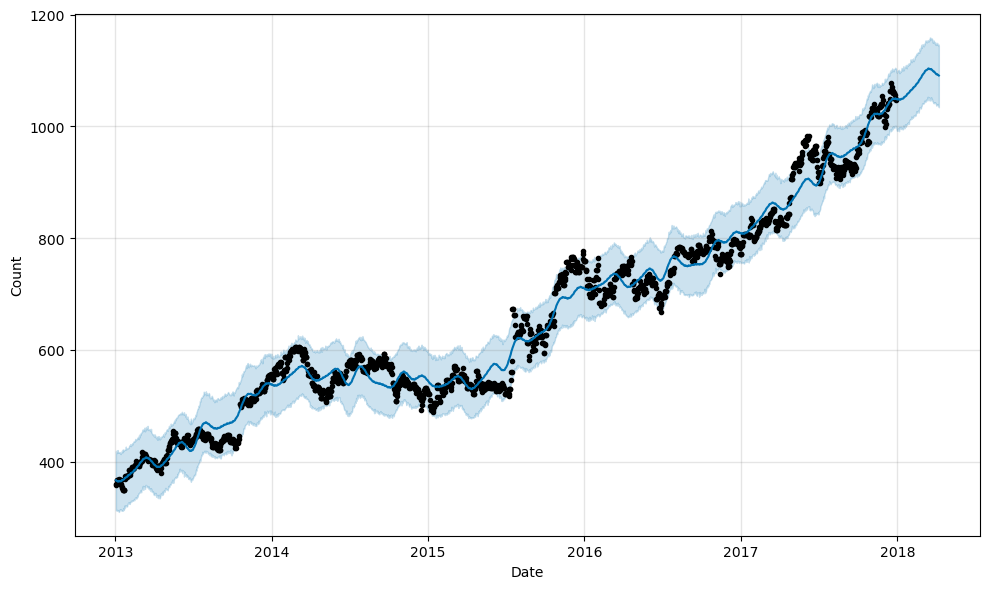

In [56]:
#Plotting the results of the whole model, including the forecast
plt.figure(figsize=(18, 6))
model2.plot(forecast2, xlabel = 'Date', ylabel = 'Count');

In [57]:
forecast2 = pd.merge(forecast2,df,how='outer',on='ds')

In [58]:
#We can also calculate the root mean squared error for the residuals. The model performance has become worse after
#hyperparameter tuning.
forecast2['residuals'] = forecast2['y'] - forecast2['yhat']
rmse2 = round(np.sqrt((forecast2['residuals'] ** 2).mean()),2)
print(f'The root mean squared error is: {rmse2}')
count_mean = df['y'].mean()
print(f'rmse is {round(rmse2*100/count_mean,2)}% of the mean value of Close price')

The root mean squared error is: 26.58
rmse is 4.08% of the mean value Close price


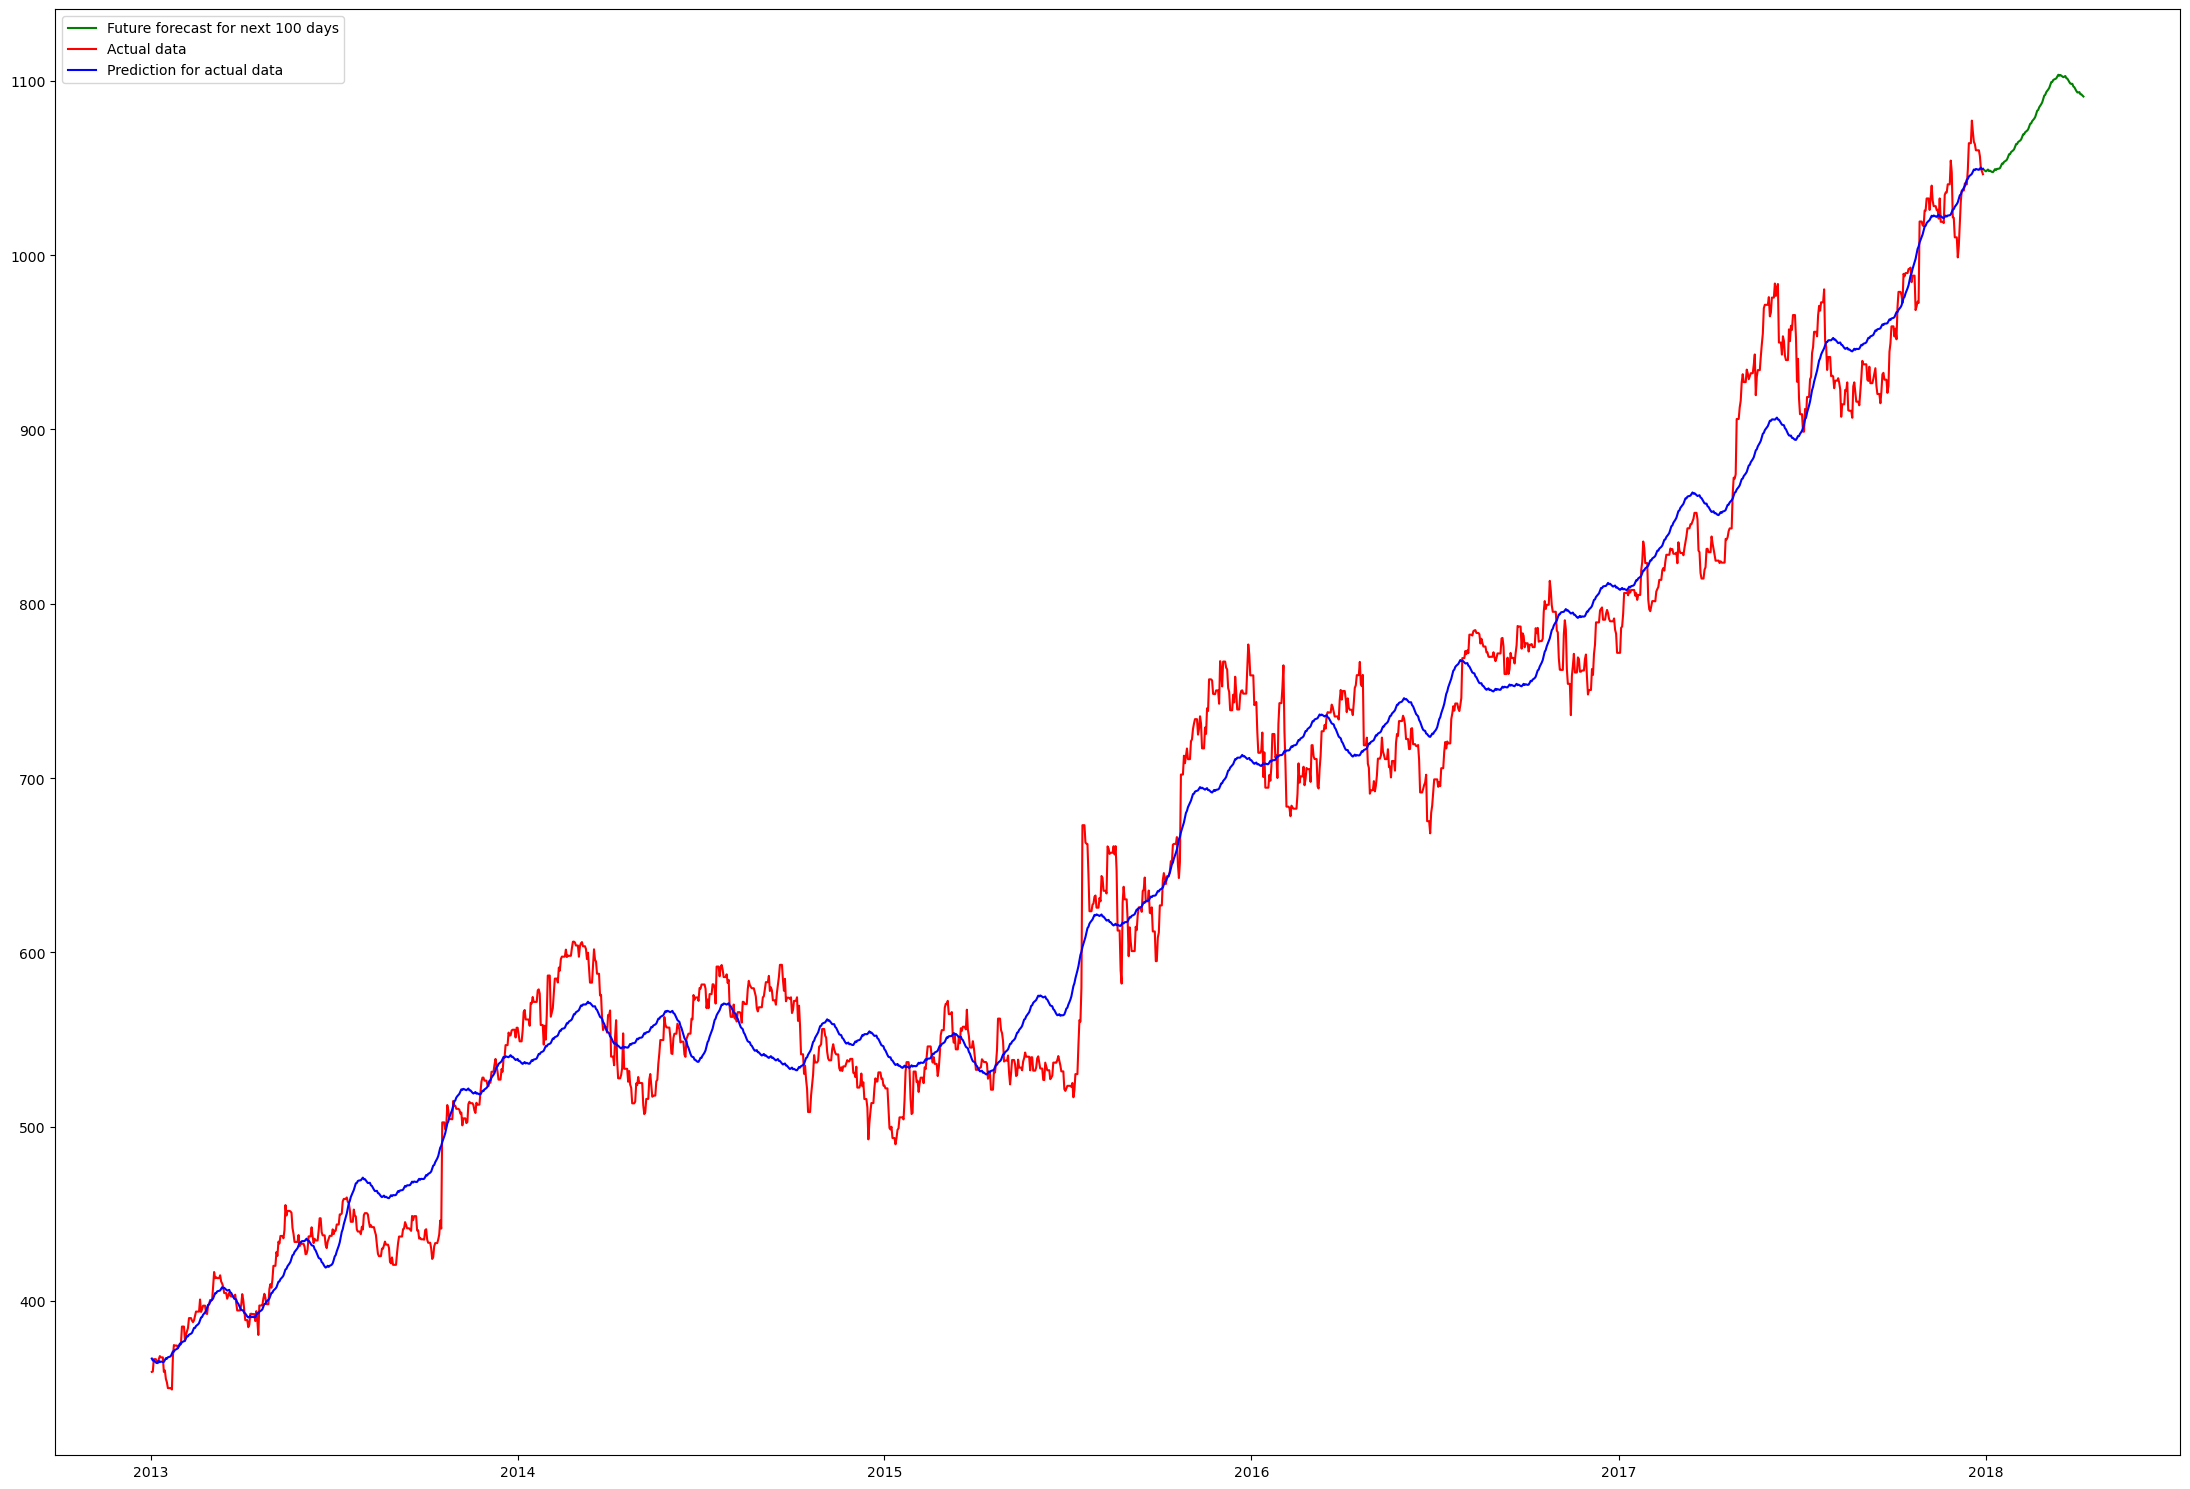

In [59]:
plt.figure(figsize=(22, 15))
plt.plot(forecast2[-100:]['ds'],forecast2[-100:]['yhat'],label='Future forecast for next 100 days',color='g')
plt.plot(forecast2[:-100]['ds'],forecast2[:-100]['y'],label='Actual data',color='r')
plt.plot(forecast2[:-100]['ds'],forecast2[:-100]['yhat'],label='Prediction for actual data',color='b')
plt.legend()
plt.tight_layout()

/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/muhammadobeidat/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


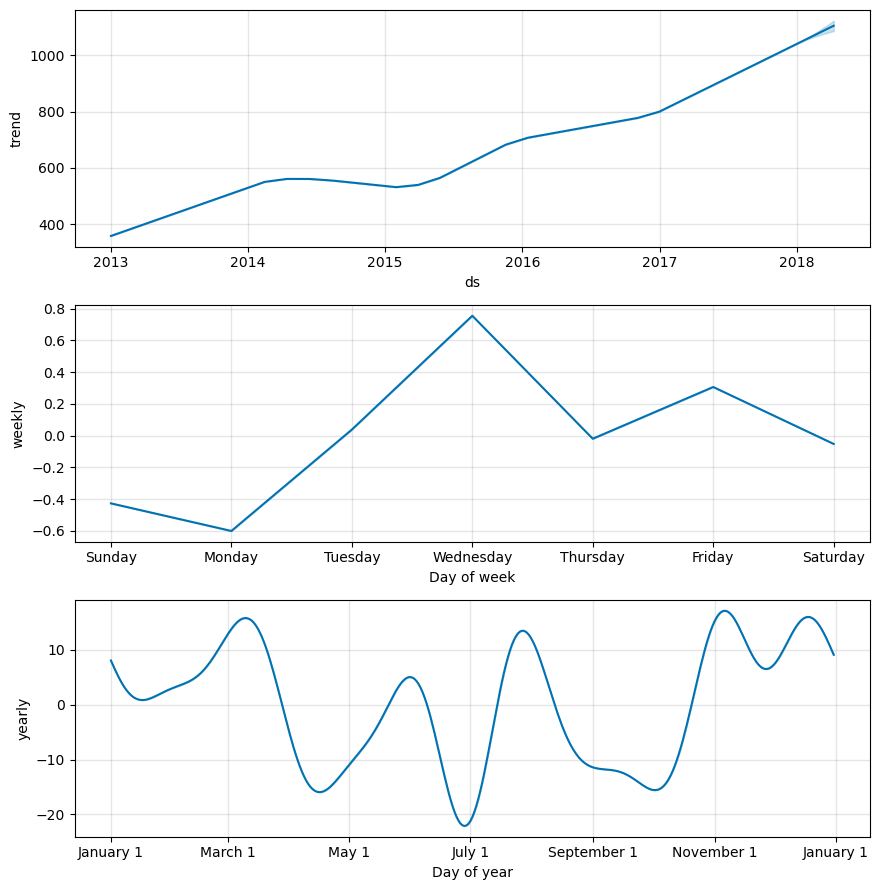

In [60]:
#Showing the components of the model
model2.plot_components(forecast2);